<a href="https://colab.research.google.com/github/GabrielaFuller/Aether/blob/main/Another_copy_of_Copy_of_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Proposal

From "Netflix and Chill" to "Netflix and SPILL": Market Volatility of Streaming Stocks Using Machine Learning — GARCH, ARIMA, Random Forest, and XGBoost in Predictive Modeling



# Introduction

Streaming stocks are some of those most volatile on the market, simply because they are susceptible to viewer taste, market share, and entertainment variety that is now available.

Stock volatility refers to the stock's price fluctuation over a period of time. A stock price changing rapidly in a short period of time is indicative of high volatility. Alternatively, a stock price remaining steady is considered low volatility.

Stock volatility is measured by the standard deviation, a measure of how far the returns are from the mean. Investors will be especially interested in the volatility of stocks, especially when looking to balance portfolios for high-risk versus low-risk.

# Data

Data will be sourced from Alpaca API using the following stock:

Netflix
Roku
Spotify

I will be using 10 years worth of data from 1/1/2015-2025. My test set will be the last 2 years of 2023-2025. This will require using SMOTE to compensate for the stock post-COVID.  

These 3 were chosen since these encompass 3 different market types. Additionally, Roku also produces streaming devices along with streaming services. Netflix streams movies and TV, and is now streaming gaming services. Spotify mainly streams music, audiobooks, and podcasts.

While Disney+, Amazon Prime, and Apple TV were considered, it would be difficult to seperate the streaming stock from the conglomerates.



# Methodology

Using GARCH, ARIMA, Random Forest, and XGBoost, these are the machine learning methods chosen for predicting the stock market volatility.

# GARCH
GARCH is ideal for modeling time-varying volatility. It will directly model the volatility and not the price, and accounts for the volatility clustering. This is common in financial data. Big movements follow big movements. This is used in price forecasting. This method is built on past squared past squared residuals and past forecasted variance on estimated future variance. It's often used in finance models.

# ARIMA

From Investopedia: https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp

Autoregression (AR): refers to a model that shows a changing variable that regresses on its own lagged, or prior, values.

Integrated (I): represents the differencing of raw observations to allow the time series to become stationary (i.e., data values are replaced by the difference between the data values and the previous values).

Moving average (MA):  incorporates the dependency between an observation and a residual error from a moving average model applied to lagged observations.

This model was chosen since it uses both trend and seasonality in time series. It's effective in forecasting price levels using past values.

Autoregressive integrated moving average (ARIMA) models predict future values based on past values.

It only works with stationary time series and doesn't really work well with nonlinear relationships.

# Random Forest

Since this dataset is nonlinear and feature-rich, I chose random forest as an additional method to analyze the data. This method is also robust against overfitting and can handle a large number of variables like sentiment and macroeconomic data.

Random forest is generated by an ensemble of decision trees built from random subsets of data and features. The averaging of the outputs of the individual trees are predicted from the results. This method treats rows as independent and is not time-aware.

# XGBoost

The data pulled from Alphavantage is tabular, mainly numeric and date-based. This method will also handle real-time systems.

XGBoost builds trees sequentially to correct the errors of previous ones, optimizing a loss function using gradient descent. It will require manual feature engineering, but this was already anticipated.  

In [ ]:
import requests
import pandas as pd
import json

API_KEY = '7H58D0LVU1LNGWPH'
TICKERS = ['XLC','SMH','QQQ','SPY','VXZ','USD','ROKU','NFLX','SPOT']
START_DATE = '2015-01-01'
END_DATE = '2025-05-14'

def fetch_stock_data(symbol):
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={API_KEY}'
    response = requests.get(url)
    data = response.json()

    if "Time Series (Daily)" not in data:
        print(f"Error fetching data for {symbol}: {data.get('Note') or data.get('Error Message')}")
        return None

    df = pd.DataFrame.from_dict(data['Time Series (Daily)'], orient='index')
    df.columns = ['open', 'high', 'low', 'close', 'volume']
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    df = df.loc[START_DATE:END_DATE]
    df = df.astype(float)
    df=df[['close']]
    df=df.rename(columns={'close':symbol+'close'})
    return df


features_data = {}

for ticker in TICKERS:
    df = fetch_stock_data(ticker)
    if df is not None:
        features_data[ticker] = df
        print(f"\n{ticker} — {df.shape[0]} rows from {df.index.min().date()} to {df.index.max().date()}")
        display(df)



XLC — 1736 rows from 2018-06-19 to 2025-05-14


XLCclose
2018-06-19     49.96
2018-06-20     50.58
2018-06-21     50.27
2018-06-22     50.49
2018-06-25     49.45
...              ...
2025-05-08     97.68
2025-05-09     97.18
2025-05-12     99.20
2025-05-13    100.17
2025-05-14    100.69

[1736 rows x 1 columns]


SMH — 2607 rows from 2015-01-02 to 2025-05-14


SMHclose
2015-01-02     54.49
2015-01-05     53.52
2015-01-06     52.26
2015-01-07     52.94
2015-01-08     54.26
...              ...
2025-05-08    221.95
2025-05-09    223.40
2025-05-12    237.41
2025-05-13    245.56
2025-05-14    247.99

[2607 rows x 1 columns]


QQQ — 2607 rows from 2015-01-02 to 2025-05-14


QQQclose
2015-01-02    102.94
2015-01-05    101.43
2015-01-06    100.07
2015-01-07    101.36
2015-01-08    103.30
...              ...
2025-05-08    488.29
2025-05-09    487.97
2025-05-12    507.85
2025-05-13    515.59
2025-05-14    518.68

[2607 rows x 1 columns]


SPY — 2607 rows from 2015-01-02 to 2025-05-14


SPYclose
2015-01-02    205.43
2015-01-05    201.72
2015-01-06    199.82
2015-01-07    202.31
2015-01-08    205.90
...              ...
2025-05-08    565.06
2025-05-09    564.34
2025-05-12    582.99
2025-05-13    586.84
2025-05-14    587.59

[2607 rows x 1 columns]


VXZ — 1841 rows from 2018-01-18 to 2025-05-14


VXZclose
2018-01-18   16.9000
2018-01-19   16.9000
2018-01-22   16.7200
2018-01-23   16.9500
2018-01-24   16.9500
...              ...
2025-05-08   60.7248
2025-05-09   60.1375
2025-05-12   55.7900
2025-05-13   55.7900
2025-05-14   56.1900

[1841 rows x 1 columns]


USD — 2607 rows from 2015-01-02 to 2025-05-14


USDclose
2015-01-02   94.4600
2015-01-05   91.4900
2015-01-06   87.2700
2015-01-07   88.8400
2015-01-08   94.3445
...              ...
2025-05-08   43.8800
2025-05-09   43.8800
2025-05-12   49.2000
2025-05-13   53.6500
2025-05-14   56.2300

[2607 rows x 1 columns]


ROKU — 1917 rows from 2017-09-28 to 2025-05-14


ROKUclose
2017-09-28      23.50
2017-09-29      26.54
2017-10-02      23.56
2017-10-03      20.81
2017-10-04      20.85
...               ...
2025-05-08      61.36
2025-05-09      60.93
2025-05-12      68.78
2025-05-13      71.40
2025-05-14      71.88

[1917 rows x 1 columns]


NFLX — 2607 rows from 2015-01-02 to 2025-05-14


NFLXclose
2015-01-02    348.940
2015-01-05    331.180
2015-01-06    325.510
2015-01-07    327.200
2015-01-08    334.455
...               ...
2025-05-08   1144.430
2025-05-09   1140.220
2025-05-12   1110.000
2025-05-13   1138.440
2025-05-14   1150.990

[2607 rows x 1 columns]


SPOT — 1790 rows from 2018-04-03 to 2025-05-14


SPOTclose
2018-04-03     149.01
2018-04-04     144.22
2018-04-05     143.99
2018-04-06     147.92
2018-04-09     150.00
...               ...
2025-05-08     655.26
2025-05-09     648.25
2025-05-12     620.81
2025-05-13     620.07
2025-05-14     633.23

[1790 rows x 1 columns]

In [ ]:
import requests
import pandas as pd
import numpy as np

API_KEY = '7H58D0LVU1LNGWPH'
TICKERS = ['NFLX', 'ROKU', 'SPOT','XLC','SMH','QQQ','SPY','USD']
START_DATE = '2015-01-01'
END_DATE = '2025-01-01'

stock_data = {}

for ticker in TICKERS:
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={ticker}&outputsize=full&apikey={API_KEY}'
    response = requests.get(url)
    data = response.json()

    if 'Time Series (Daily)' not in data:
        print(f"Failed to fetch data for {ticker}")
        continue

    ts_data = data['Time Series (Daily)']
    df = pd.DataFrame.from_dict(ts_data, orient='index')
    df.columns = ['open', 'high', 'low', 'close', 'volume']
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    df = df.loc[START_DATE:END_DATE]
    df = df.astype(float)
    df=df[['close']]
    df=df.rename(columns={'close':ticker+'close'})
    stock_data[ticker] = df
    print(f"{ticker}: {df.shape[0]} rows from {df.index.min().date()} to {df.index.max().date()}")

from IPython.display import display
display(stock_data['NFLX'].head())
display(stock_data['ROKU'].head())
display(stock_data['SPOT'].head())


#display(stock_data['ROKU'])
#display(stock_data['SPOT'])
stock_data['NFLX']=pd.concat([stock_data['NFLX'],stock_data['ROKU'],stock_data['SPOT'],stock_data['XLC'],stock_data['SMH'],stock_data['QQQ'],stock_data['SPY'],stock_data['USD'],],axis=1, join='inner')

stock_data['NFLX']['NFLXVolatility']=stock_data['NFLX']['NFLXclose'].rolling(window=40).std() #* np.sqrt(252)
stock_data['NFLX']=stock_data['NFLX'].dropna()
stock_data['NFLX'].loc[:,stock_data['NFLX'].columns != 'NFLXVolatility']=stock_data['NFLX'].loc[:,stock_data['NFLX'].columns != 'NFLXVolatility'].pct_change(40)
stock_data['NFLX']['NFLXVolatility']=stock_data['NFLX']['NFLXVolatility'].shift(-40)
stock_data['NFLX']=stock_data['NFLX'].dropna()
#stock_data['NFLX']['40DayPctChge']=stock_data['NFLX']['close'].pct_change(40)

#stock_data['NFLX']['Roku40DayPctChge'] = stock_data['NFLX']['close'].pct_change() * 100
#stock_data['ROKU']
#stock_data['SPOT']
display(stock_data['NFLX'])

NFLX: 2516 rows from 2015-01-02 to 2024-12-31
ROKU: 1826 rows from 2017-09-28 to 2024-12-31
SPOT: 1699 rows from 2018-04-03 to 2024-12-31
XLC: 1645 rows from 2018-06-19 to 2024-12-31
SMH: 2516 rows from 2015-01-02 to 2024-12-31
QQQ: 2516 rows from 2015-01-02 to 2024-12-31
SPY: 2516 rows from 2015-01-02 to 2024-12-31
USD: 2516 rows from 2015-01-02 to 2024-12-31


NFLXclose
2015-01-02    348.940
2015-01-05    331.180
2015-01-06    325.510
2015-01-07    327.200
2015-01-08    334.455

ROKUclose
2017-09-28      23.50
2017-09-29      26.54
2017-10-02      23.56
2017-10-03      20.81
2017-10-04      20.85

SPOTclose
2018-04-03     149.01
2018-04-04     144.22
2018-04-05     143.99
2018-04-06     147.92
2018-04-09     150.00

NFLXclose  ROKUclose  SPOTclose  XLCclose  SMHclose  QQQclose  \
2018-10-10  -0.034371   0.011830  -0.228490 -0.076690 -0.087204 -0.053568   
2018-10-11  -0.016238   0.028802  -0.199968 -0.071633 -0.080000 -0.053730   
2018-10-12   0.053095   0.058896  -0.176076 -0.050573 -0.060334 -0.030586   
2018-10-15   0.051613   0.100232  -0.154589 -0.049784 -0.063697 -0.042533   
2018-10-16   0.056968   0.116255  -0.116148 -0.026289 -0.030675 -0.013801   
...               ...        ...        ...       ...       ...       ...   
2024-10-28   0.068111   0.122178   0.120975  0.047068  0.031833  0.040166   
2024-10-29   0.124563   0.171573   0.190596  0.076645  0.140903  0.083043   
2024-10-30   0.108963   0.219670   0.196720  0.088384  0.115869  0.077658   
2024-10-31   0.105921  -0.039280   0.171835  0.075736  0.077678  0.049475   
2024-11-01   0.135677   0.020662   0.191251  0.103020  0.138372  0.086340   

            SPYclose  USDclose  NFLXVolatility  
2018-10-10 -0.019725 -0.155041       26.842326  
2018-10-11 -0.034105 -0.158065       27.090506  
2018-10-12 -0.028550 -0.122008       26.841138  
2018-10-15 -0.037396 -0.122711       26.462660  
2018-10-16 -0.018448 -0.060678       25.378914  
...              ...       ...             ...  
2024-10-28  0.030425  0.159922       60.765799  
2024-10-29  0.053778  0.436051       59.181895  
2024-10-30  0.052745  0.391772       56.619437  
2024-10-31  0.034625  0.267506       53.681393  
2024-11-01  0.056777  0.436339       50.225936  

[1526 rows x 9 columns]

2018-10-10    26.842326
2018-10-11    27.090506
2018-10-12    26.841138
2018-10-15    26.462660
2018-10-16    25.378914
                ...    
2024-10-28    60.765799
2024-10-29    59.181895
2024-10-30    56.619437
2024-10-31    53.681393
2024-11-01    50.225936
Name: NFLXVolatility, Length: 1526, dtype: float64

Pct Change Period is 20
Correlation between NLFXVolatility and XLC: -0.110037459726409



<Figure size 640x480 with 0 Axes>

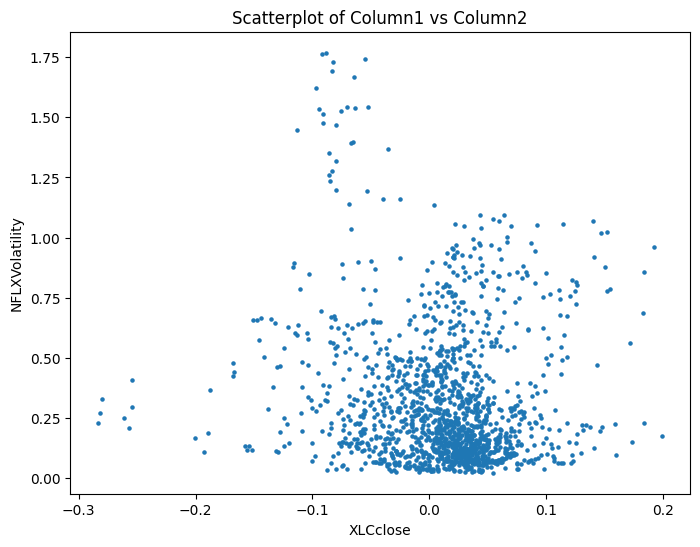

Pct Change Period is 20
Correlation between NLFXVolatility and NFLX: -0.10558343604364549



<Figure size 640x480 with 0 Axes>

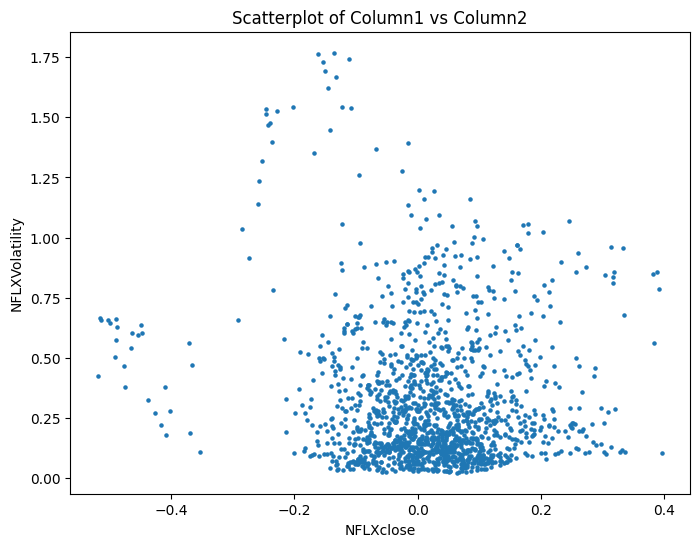

Pct Change Period is 20
Correlation between NLFXVolatility and SPOT: -0.1478191867057941



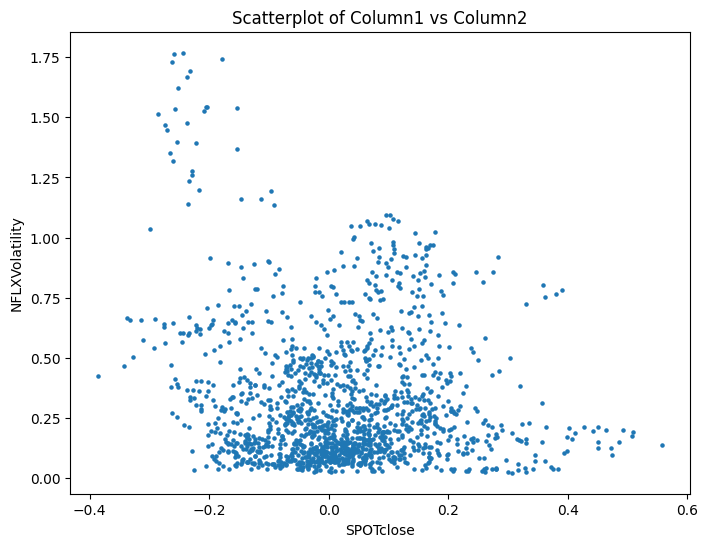

Pct Change Period is 25
Correlation between NLFXVolatility and XLC: -0.1656315160213787



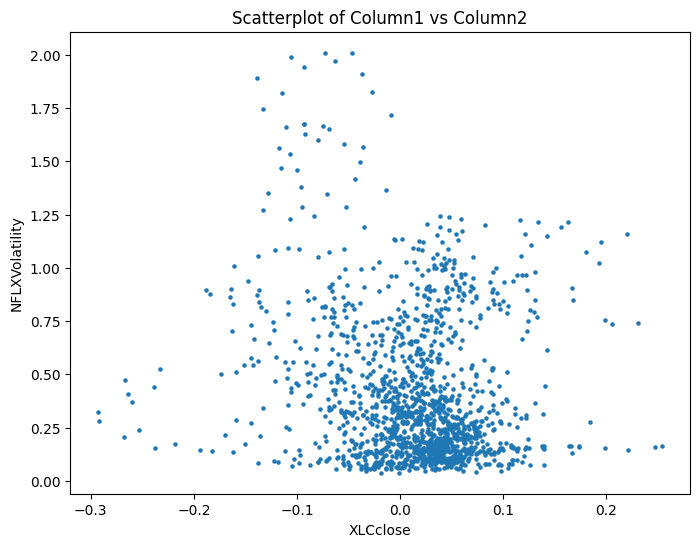

Pct Change Period is 25
Correlation between NLFXVolatility and USD: -0.16694771405604783



<Figure size 640x480 with 0 Axes>

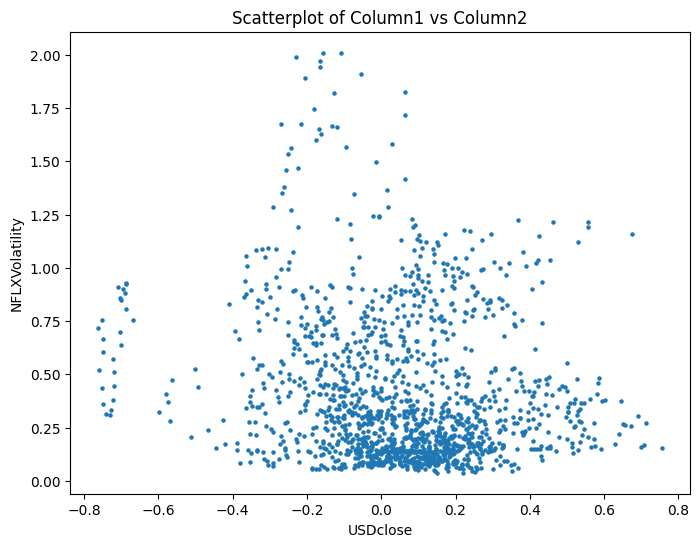

Pct Change Period is 25
Correlation between NLFXVolatility and ROKU: -0.10313435927082057



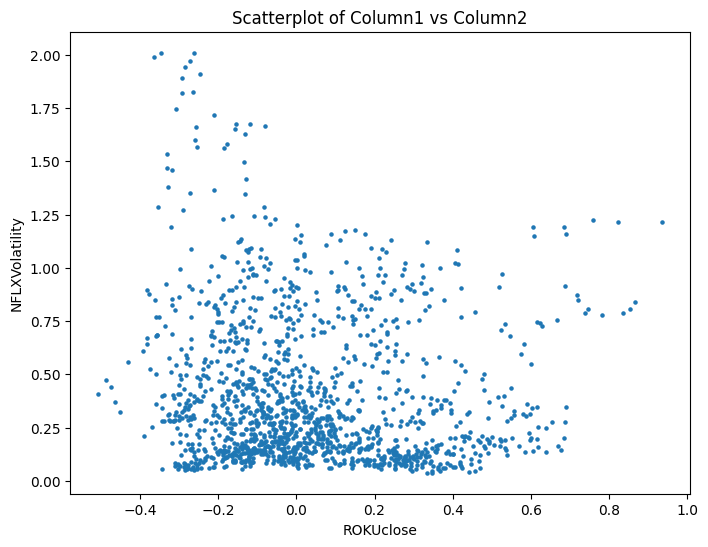

Pct Change Period is 25
Correlation between NLFXVolatility and NFLX: -0.14167703299743323



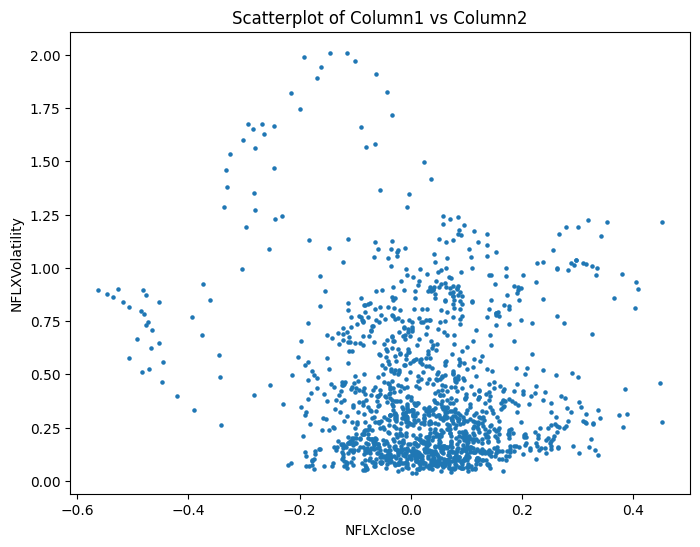

Pct Change Period is 25
Correlation between NLFXVolatility and SPOT: -0.19249366764095796



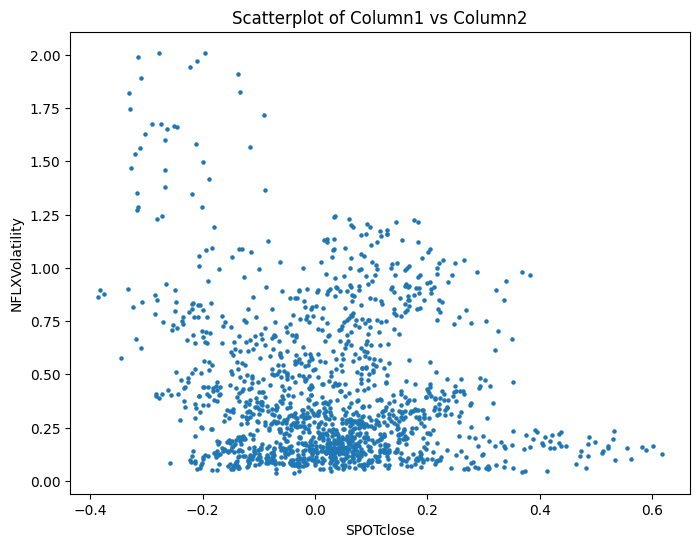

Pct Change Period is 30
Correlation between NLFXVolatility and XLC: -0.24490855179696353



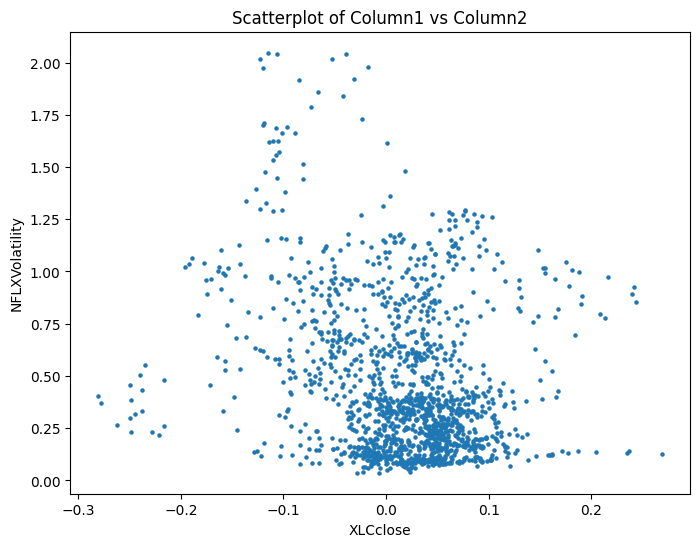

Pct Change Period is 30
Correlation between NLFXVolatility and SMH: -0.15301391636402295



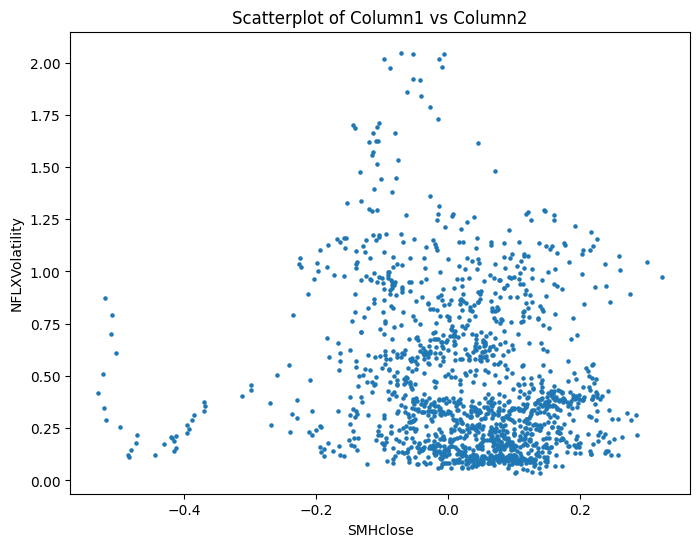

Pct Change Period is 30
Correlation between NLFXVolatility and QQQ: -0.16074274929495824



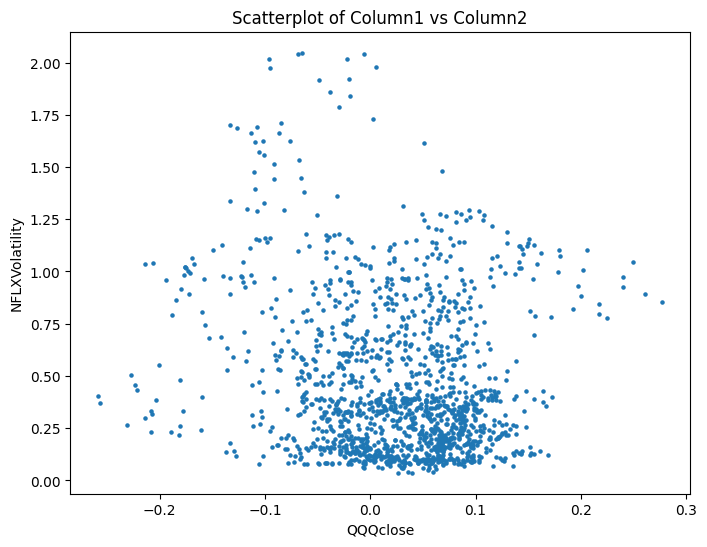

Pct Change Period is 30
Correlation between NLFXVolatility and SPY: -0.1190897068933937



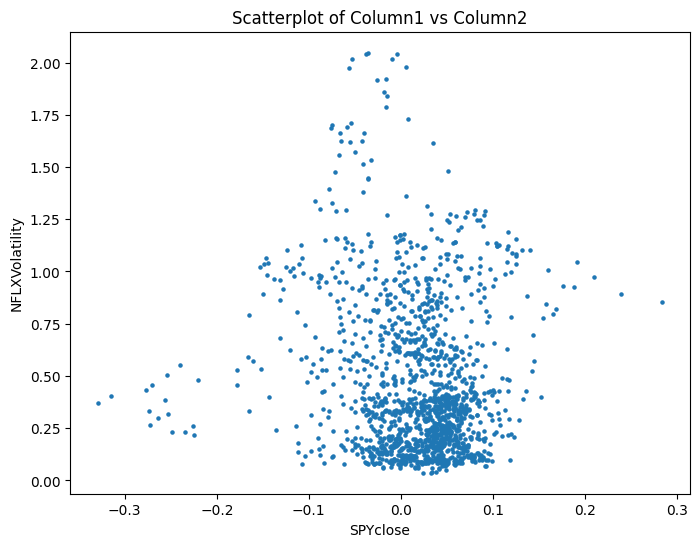

Pct Change Period is 30
Correlation between NLFXVolatility and USD: -0.21300709027694248



<Figure size 640x480 with 0 Axes>

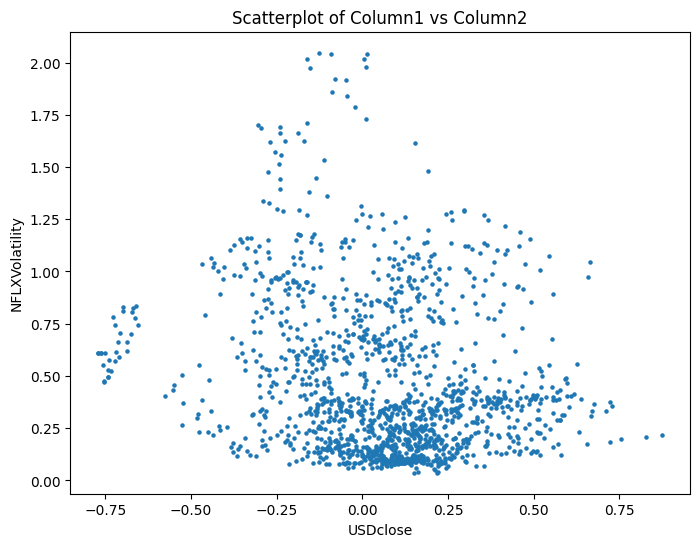

Pct Change Period is 30
Correlation between NLFXVolatility and ROKU: -0.13337112514342755



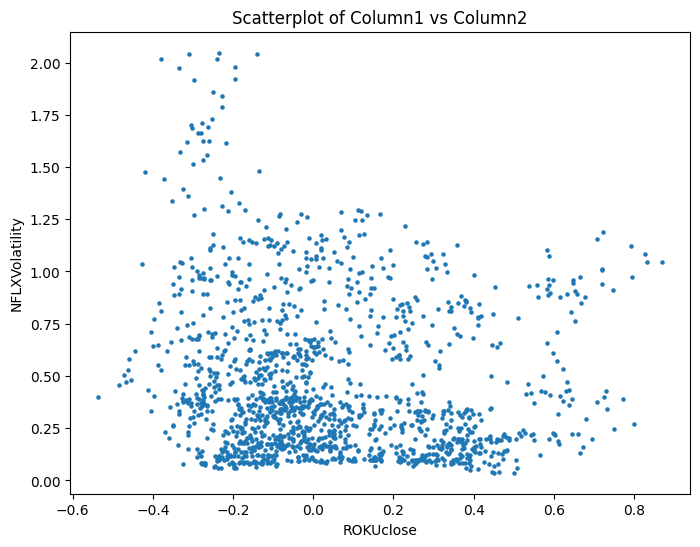

Pct Change Period is 30
Correlation between NLFXVolatility and NFLX: -0.17468135042773827



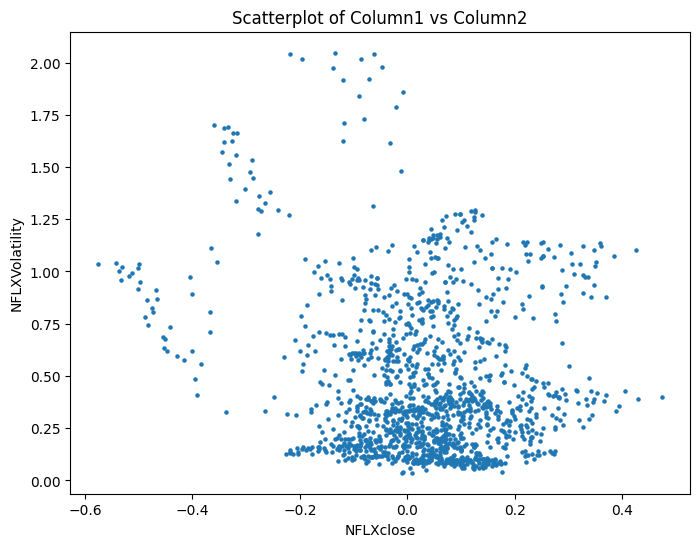

Pct Change Period is 30
Correlation between NLFXVolatility and SPOT: -0.2034759849483138



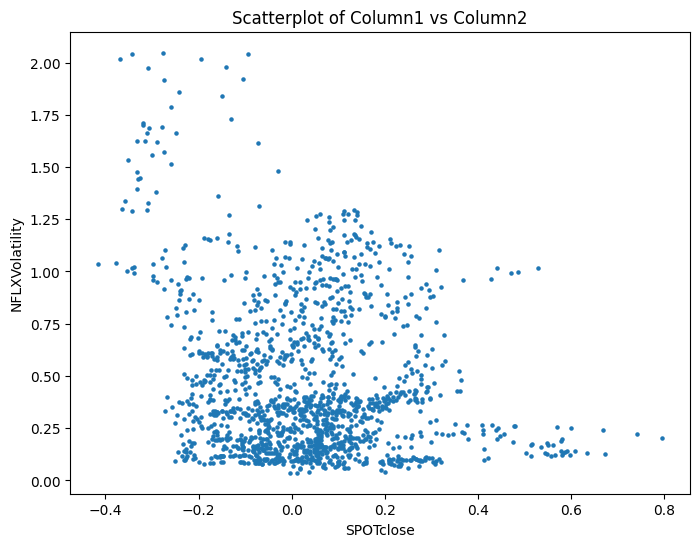

Pct Change Period is 35
Correlation between NLFXVolatility and XLC: -0.30344732917754075



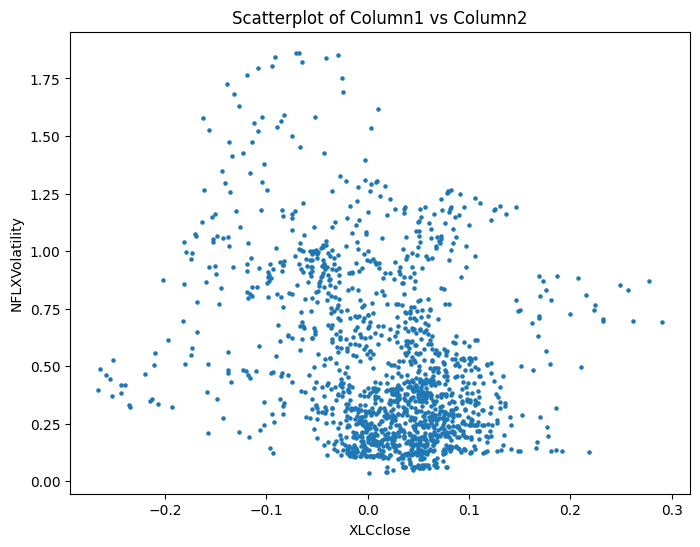

Pct Change Period is 35
Correlation between NLFXVolatility and SMH: -0.21141626735910765



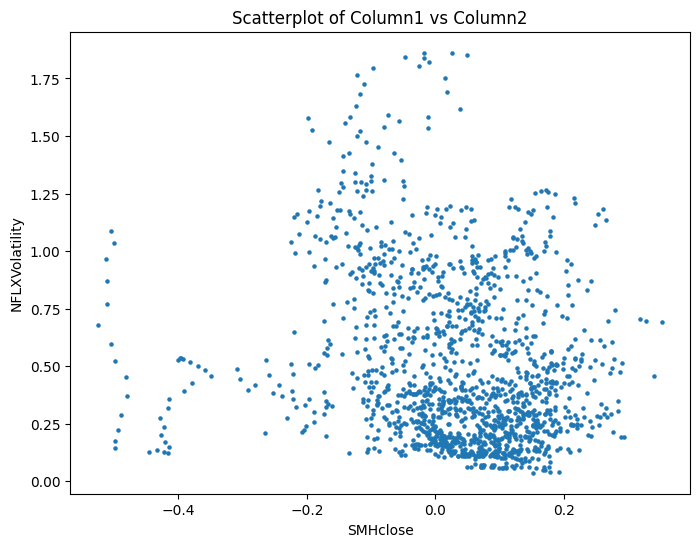

Pct Change Period is 35
Correlation between NLFXVolatility and QQQ: -0.2018400455318126



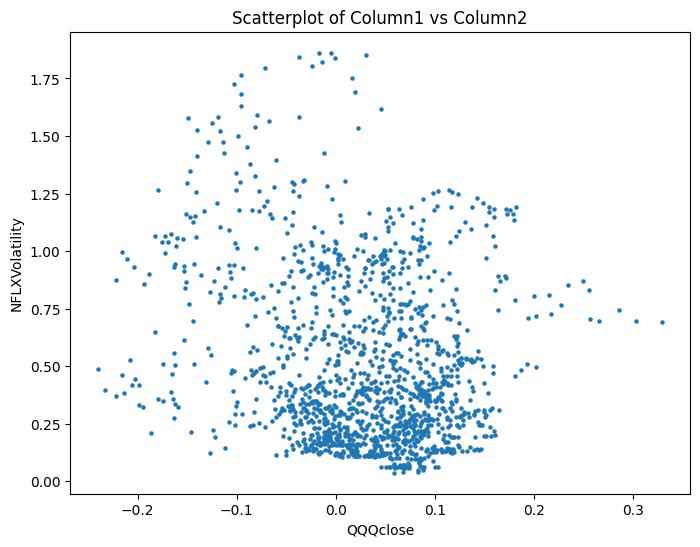

Pct Change Period is 35
Correlation between NLFXVolatility and SPY: -0.17274771667017544



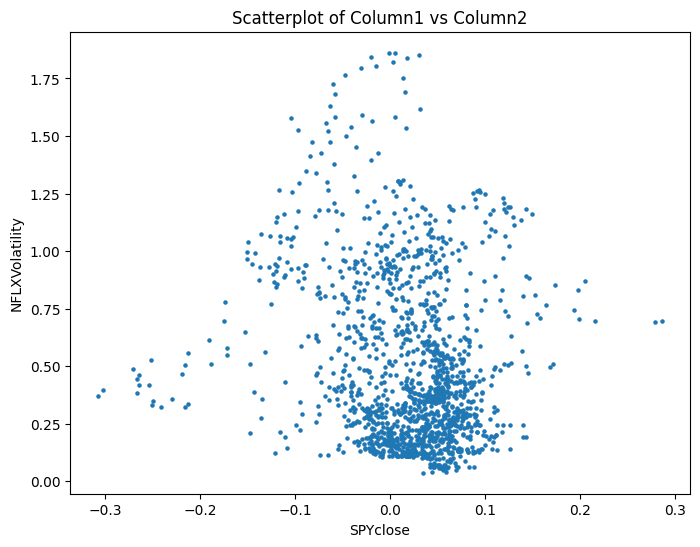

Pct Change Period is 35
Correlation between NLFXVolatility and VXZ: 0.15871531246095716



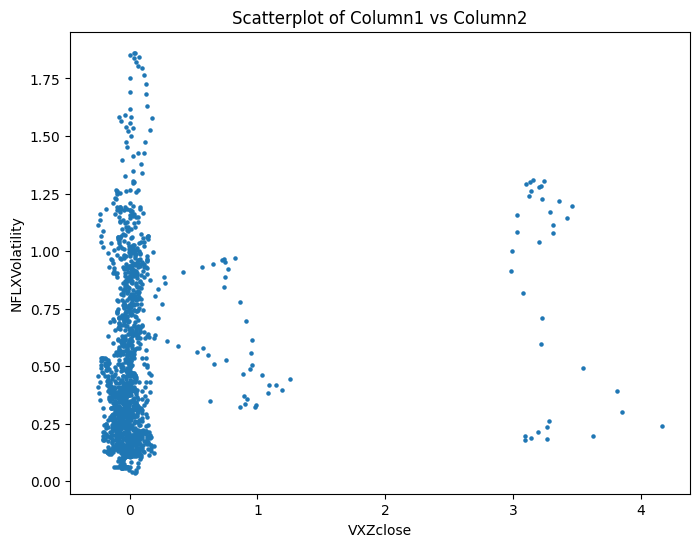

Pct Change Period is 35
Correlation between NLFXVolatility and USD: -0.21067316636937436



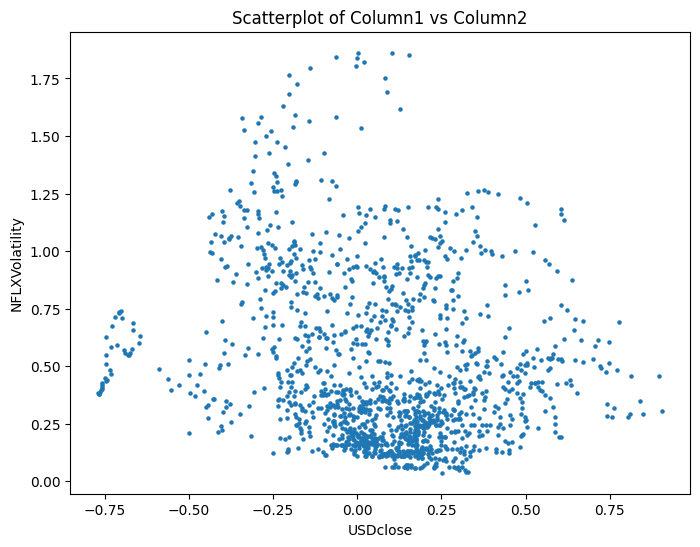

Pct Change Period is 35
Correlation between NLFXVolatility and ROKU: -0.1774261228862681



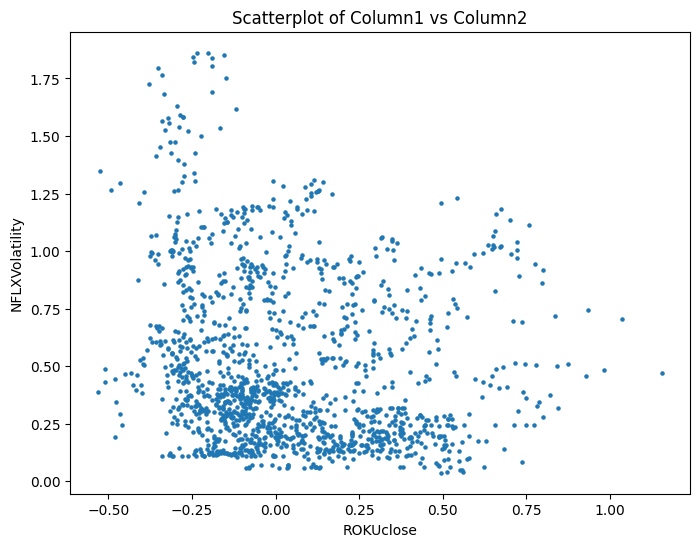

Pct Change Period is 35
Correlation between NLFXVolatility and NFLX: -0.18468692167525677



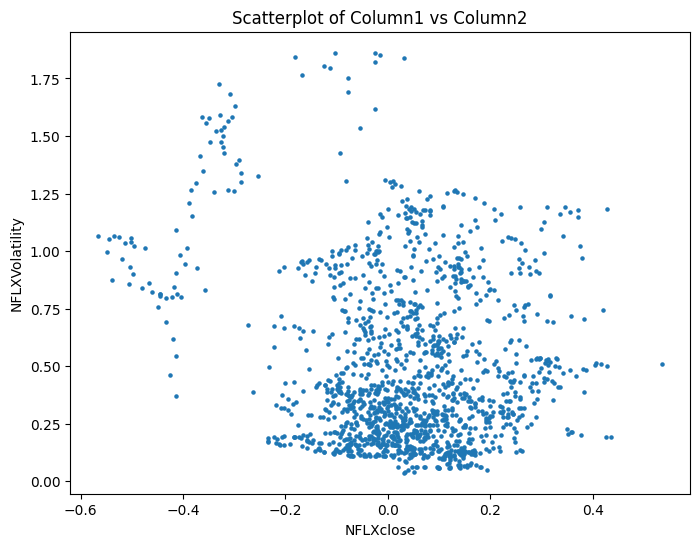

Pct Change Period is 35
Correlation between NLFXVolatility and SPOT: -0.17937426108853952



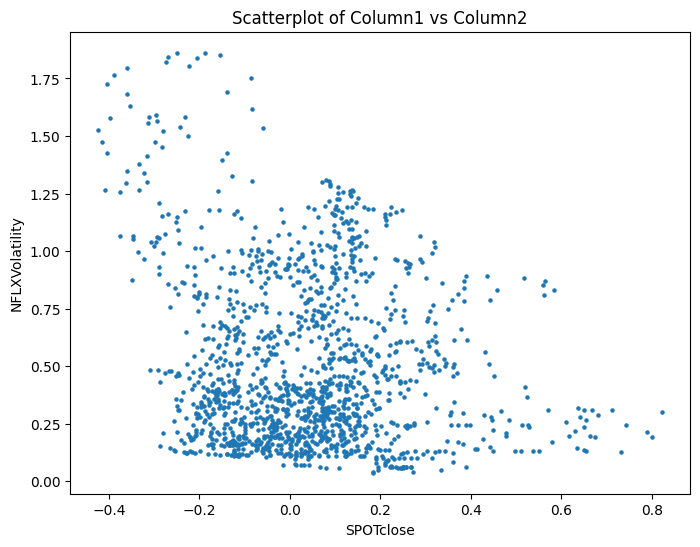

Pct Change Period is 40
Correlation between NLFXVolatility and XLC: -0.3278233942439379



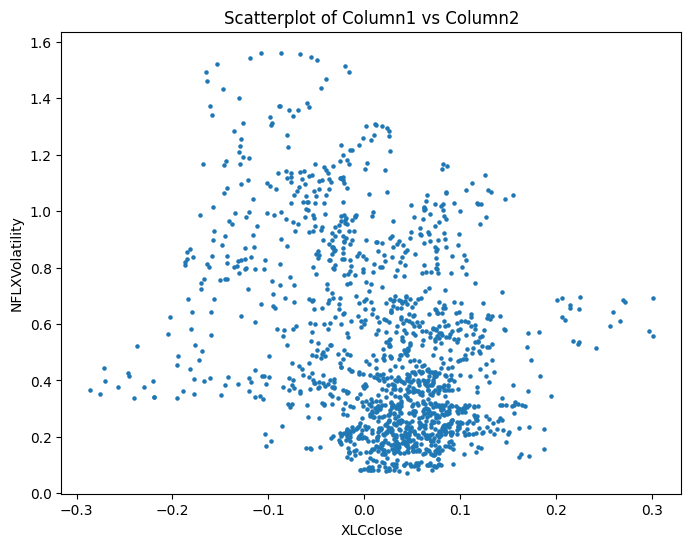

Pct Change Period is 40
Correlation between NLFXVolatility and SMH: -0.24183546059215308



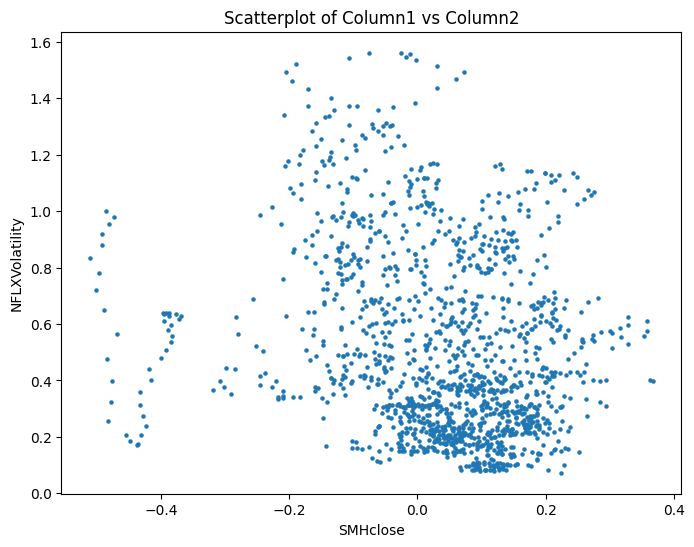

Pct Change Period is 40
Correlation between NLFXVolatility and QQQ: -0.21340536941190405



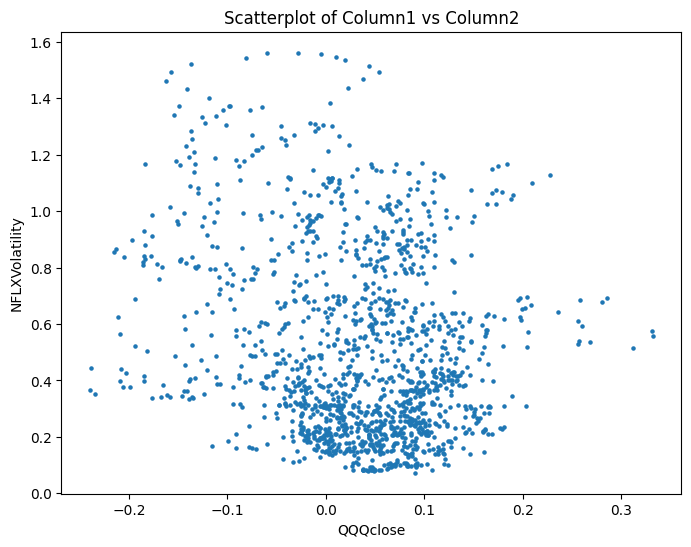

Pct Change Period is 40
Correlation between NLFXVolatility and SPY: -0.1910114269082182



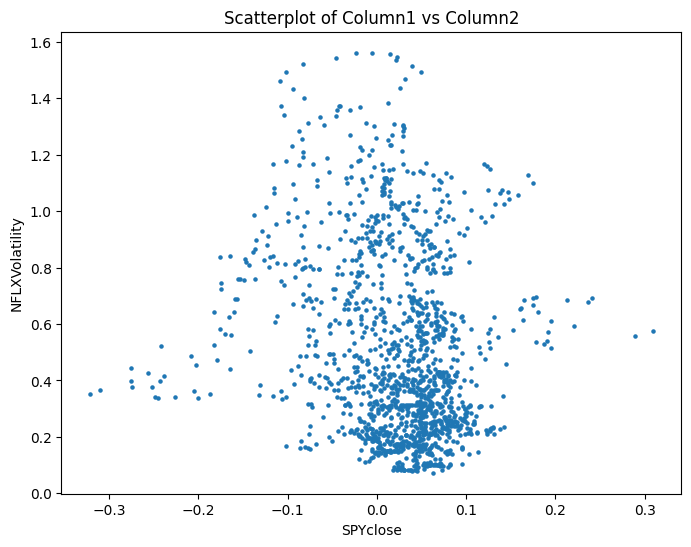

Pct Change Period is 40
Correlation between NLFXVolatility and VXZ: 0.16899770558384608



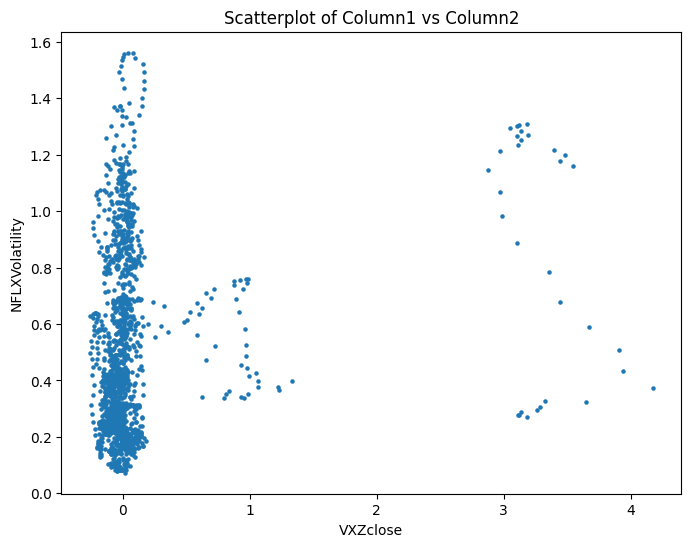

Pct Change Period is 40
Correlation between NLFXVolatility and USD: -0.15321881604636398



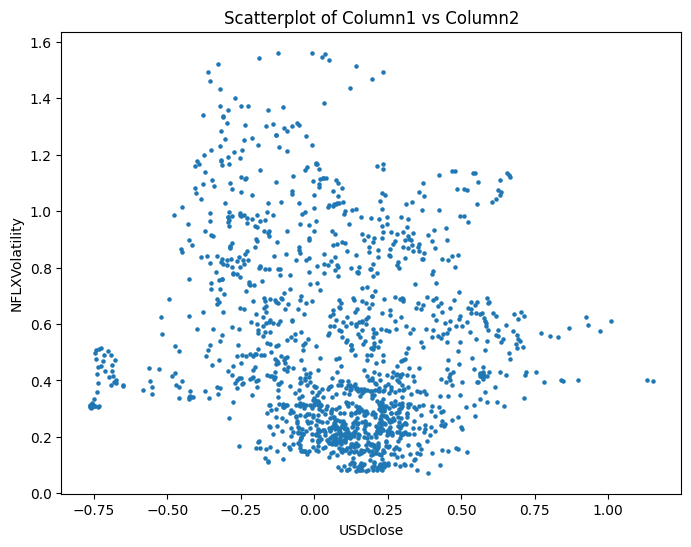

Pct Change Period is 40
Correlation between NLFXVolatility and ROKU: -0.22775192934671804



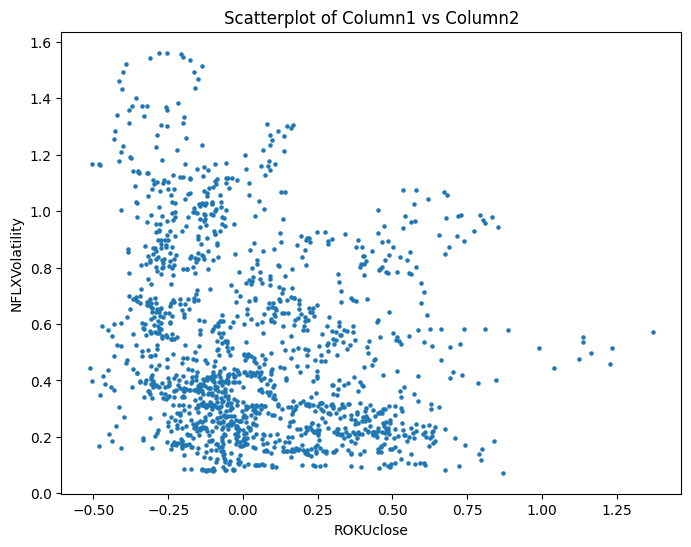

Pct Change Period is 40
Correlation between NLFXVolatility and NFLX: -0.15707215190410842



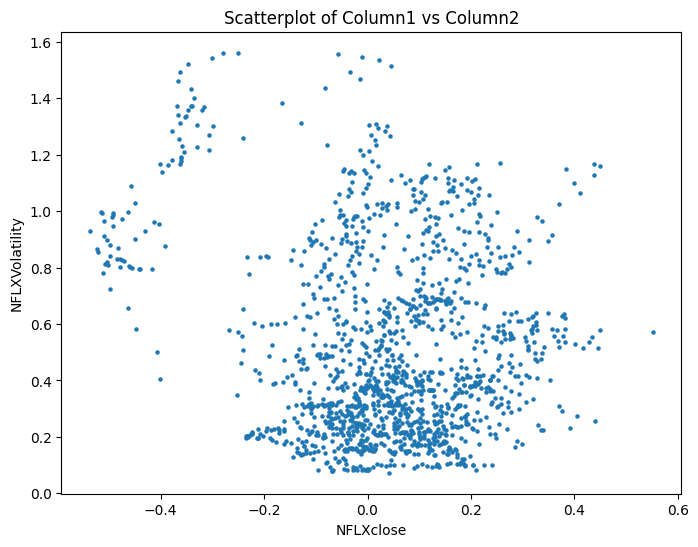

Pct Change Period is 40
Correlation between NLFXVolatility and SPOT: -0.1458681191539147



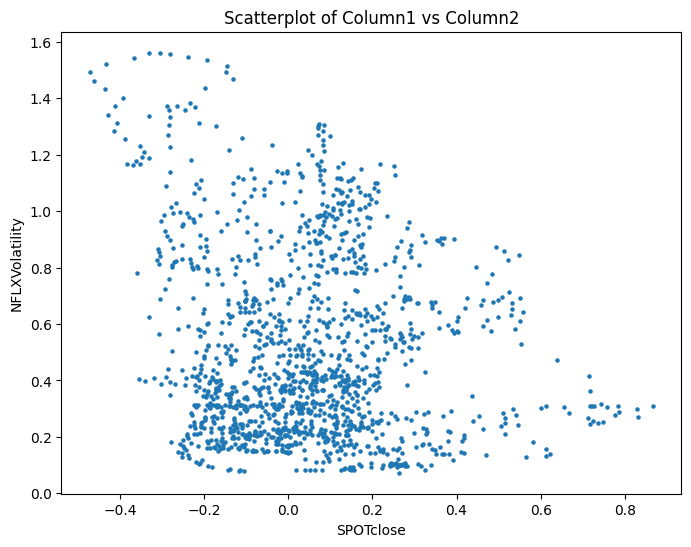

Pct Change Period is 45
Correlation between NLFXVolatility and XLC: -0.3111644431538631



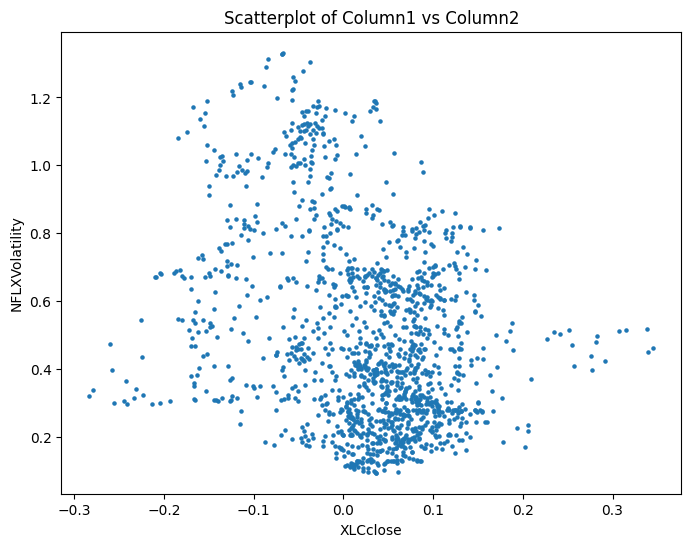

Pct Change Period is 45
Correlation between NLFXVolatility and SMH: -0.24340282365652577



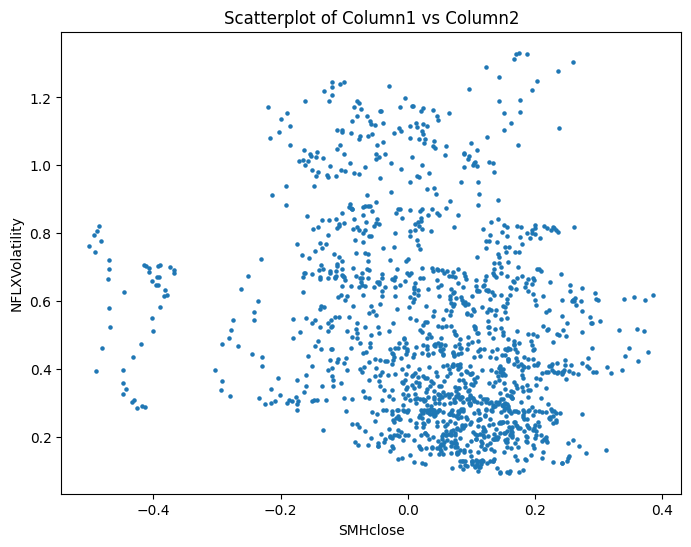

Pct Change Period is 45
Correlation between NLFXVolatility and QQQ: -0.1830418356397611



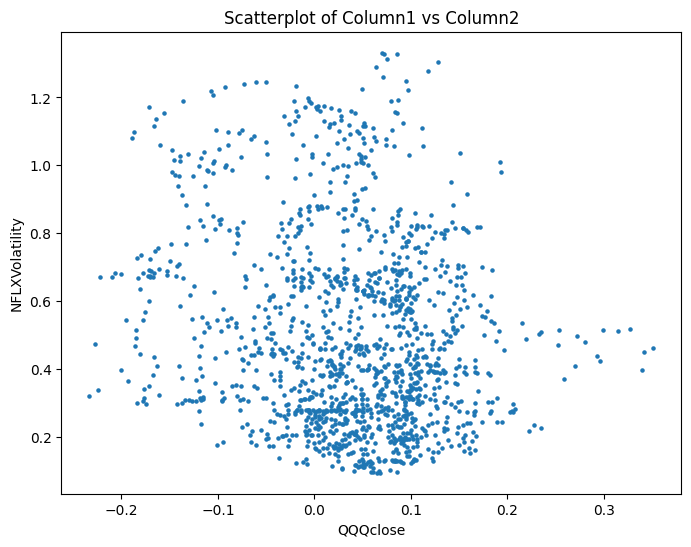

Pct Change Period is 45
Correlation between NLFXVolatility and SPY: -0.1616250860947947



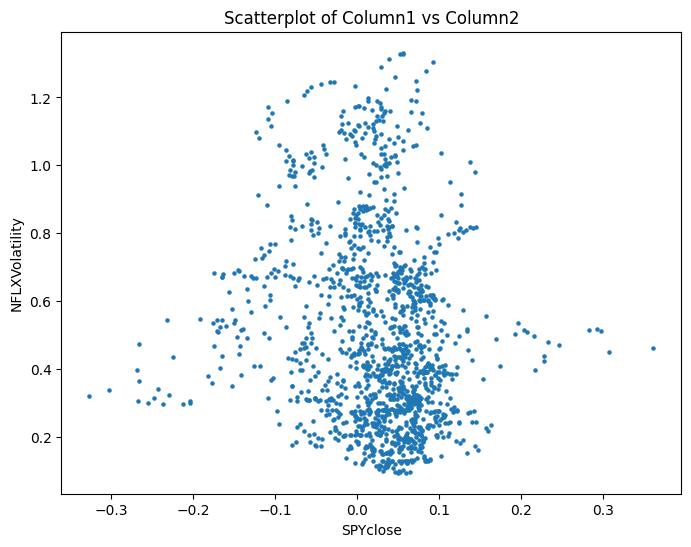

Pct Change Period is 45
Correlation between NLFXVolatility and VXZ: 0.12348590492230375



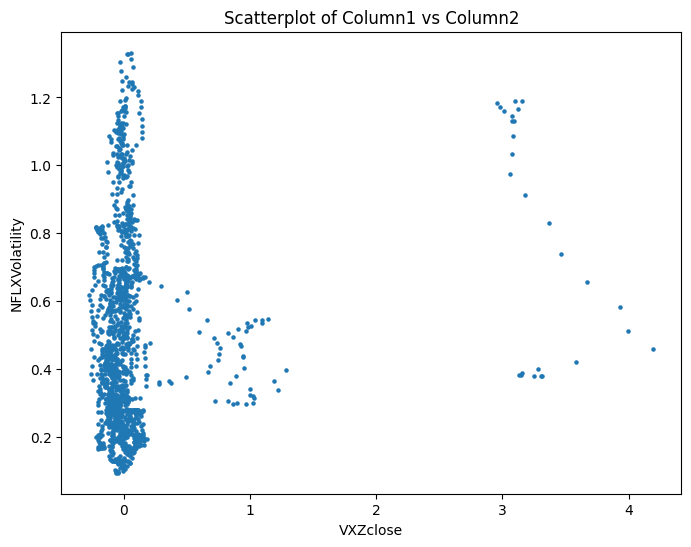

Pct Change Period is 45
Correlation between NLFXVolatility and ROKU: -0.2807829282187839



<Figure size 640x480 with 0 Axes>

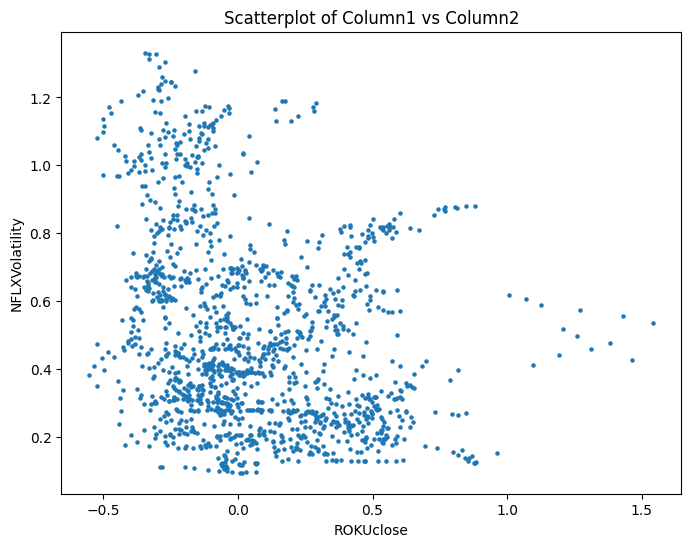

Pct Change Period is 45
Correlation between NLFXVolatility and SPOT: -0.11823438812358626



<Figure size 640x480 with 0 Axes>

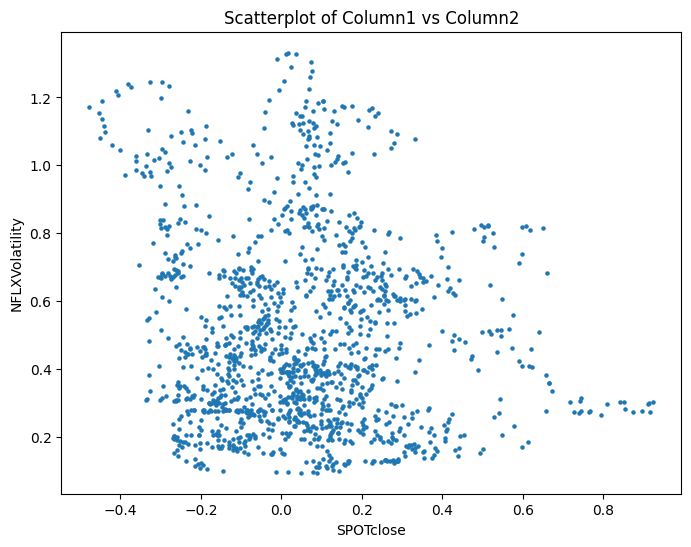

Pct Change Period is 50
Correlation between NLFXVolatility and XLC: -0.2275797355755903



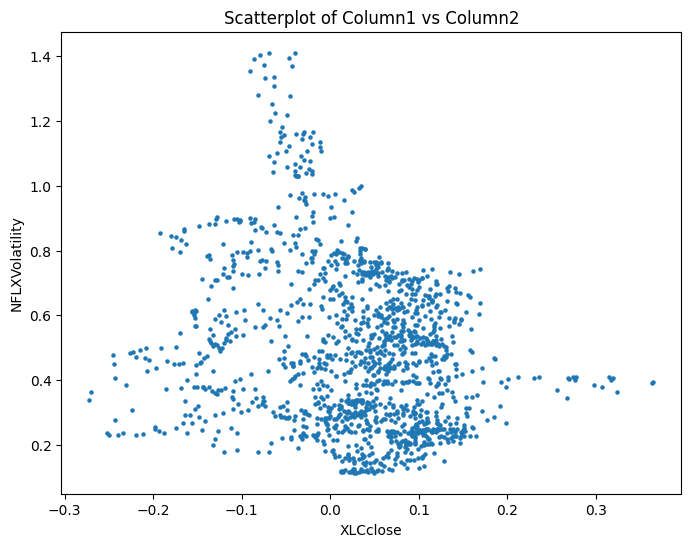

Pct Change Period is 50
Correlation between NLFXVolatility and SMH: -0.21117163107127135



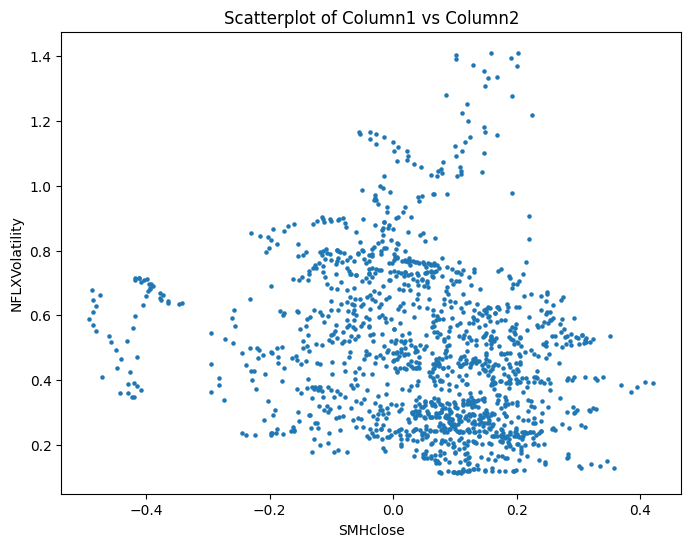

Pct Change Period is 50
Correlation between NLFXVolatility and USD: -0.1062919081360716



<Figure size 640x480 with 0 Axes>

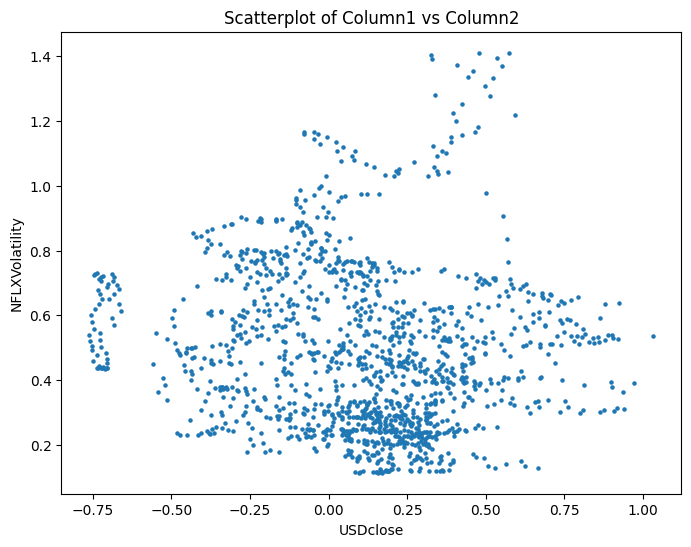

Pct Change Period is 50
Correlation between NLFXVolatility and ROKU: -0.28431444011432994



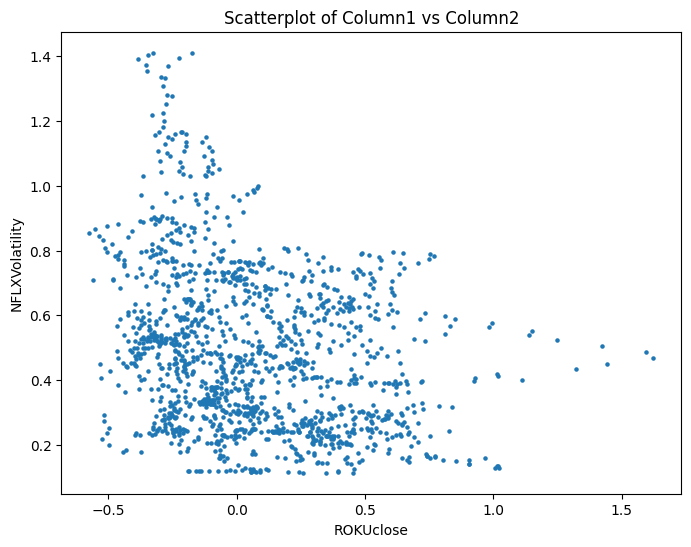

Pct Change Period is 50
Correlation between NLFXVolatility and SPOT: -0.11199398744379206



<Figure size 640x480 with 0 Axes>

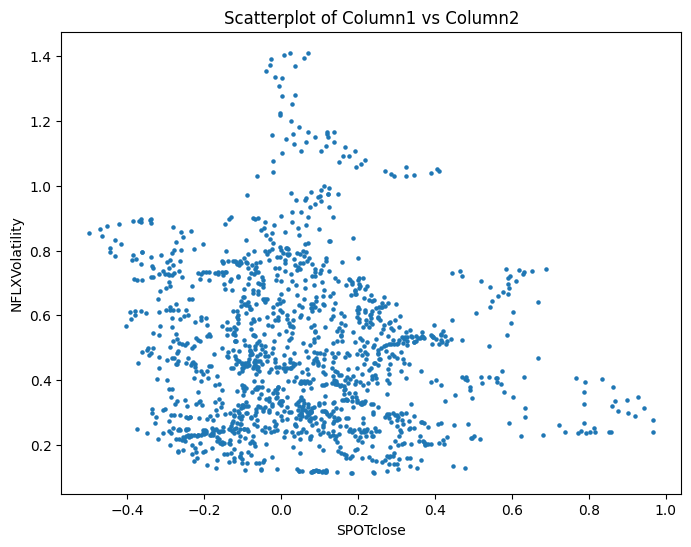

Pct Change Period is 55
Correlation between NLFXVolatility and SMH: -0.15611575133628527



<Figure size 640x480 with 0 Axes>

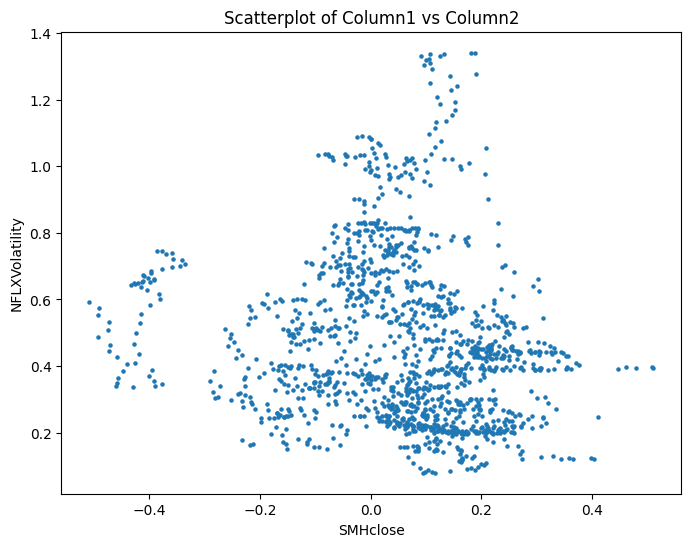

Pct Change Period is 55
Correlation between NLFXVolatility and USD: -0.15992264932506067



<Figure size 640x480 with 0 Axes>

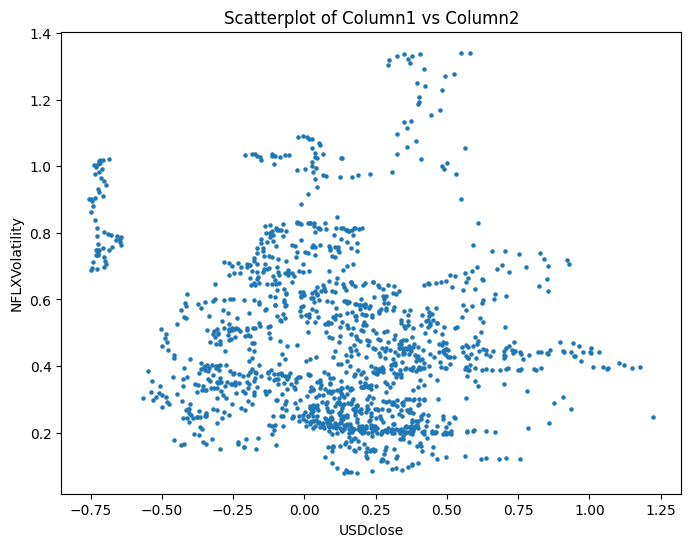

Pct Change Period is 55
Correlation between NLFXVolatility and ROKU: -0.18547805321413646



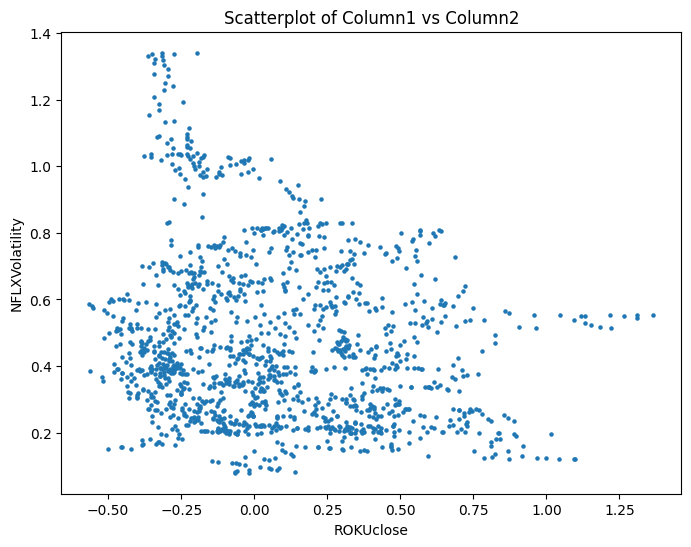

Pct Change Period is 55
Correlation between NLFXVolatility and NFLX: 0.10140374383773808



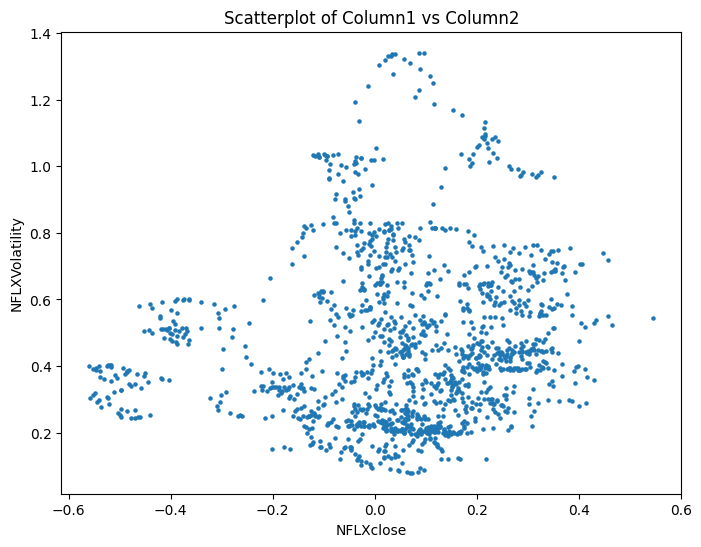

Pct Change Period is 55
Correlation between NLFXVolatility and SPOT: -0.11105233890371215



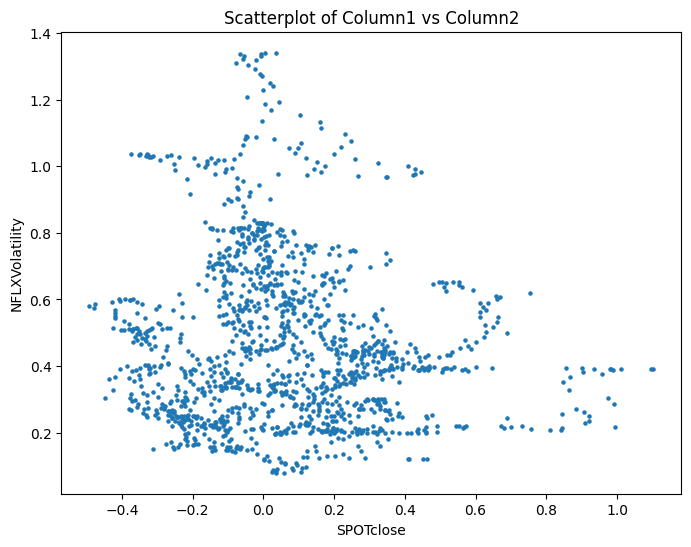

Pct Change Period is 60
Correlation between NLFXVolatility and SMH: -0.10827814497104392



<Figure size 640x480 with 0 Axes>

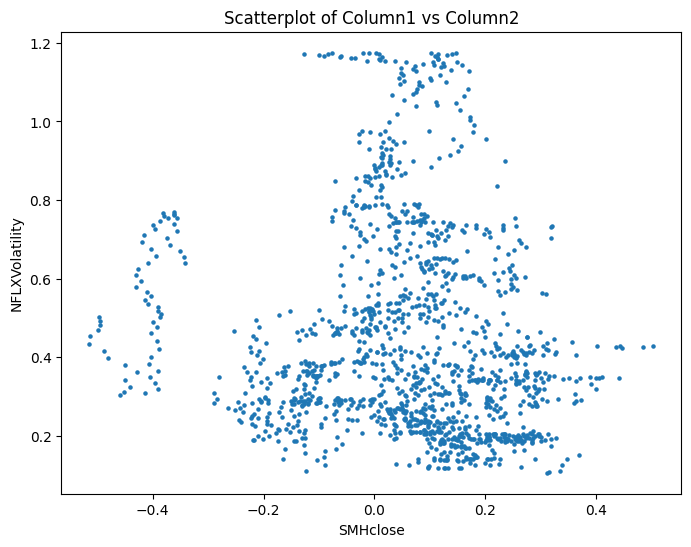

Pct Change Period is 60
Correlation between NLFXVolatility and QQQ: 0.10564285564353626



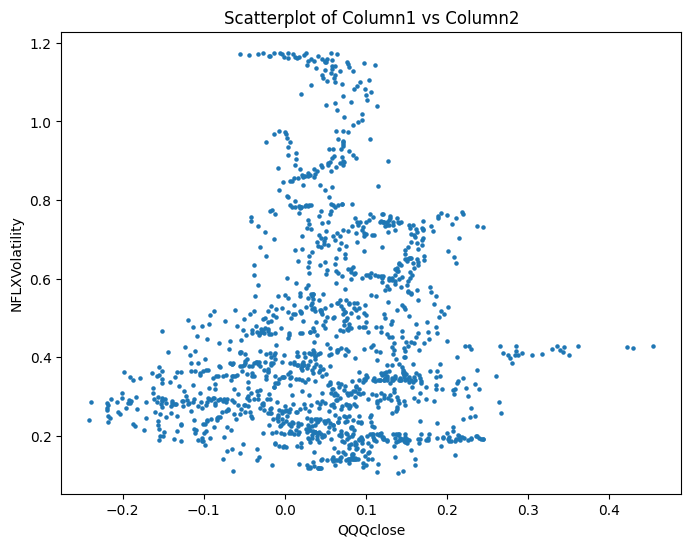

Pct Change Period is 60
Correlation between NLFXVolatility and SPY: 0.12213375632598872



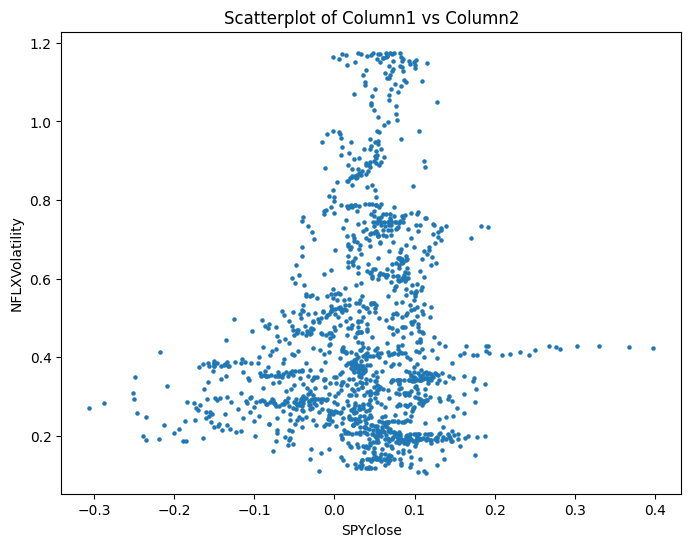

Pct Change Period is 60
Correlation between NLFXVolatility and VXZ: -0.10345325440298697



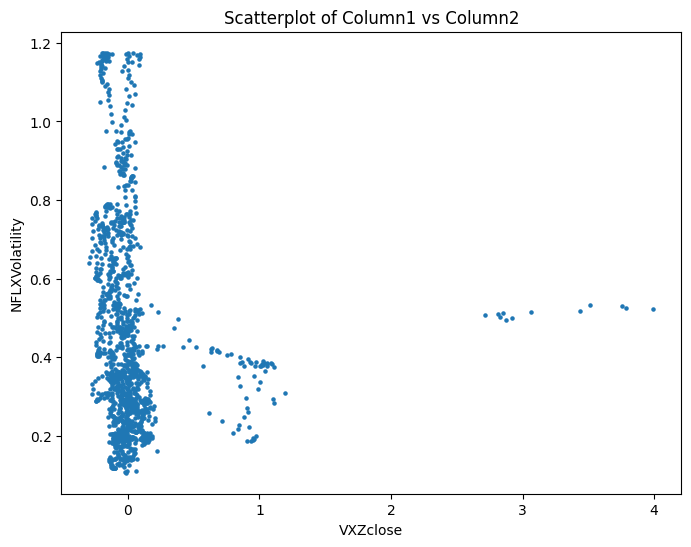

Pct Change Period is 60
Correlation between NLFXVolatility and USD: -0.16895898684606775



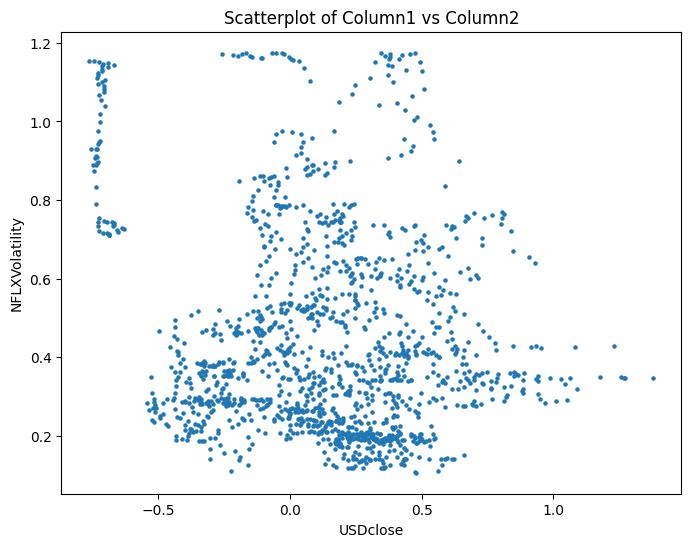

Pct Change Period is 60
Correlation between NLFXVolatility and NFLX: 0.155728006801583



<Figure size 640x480 with 0 Axes>

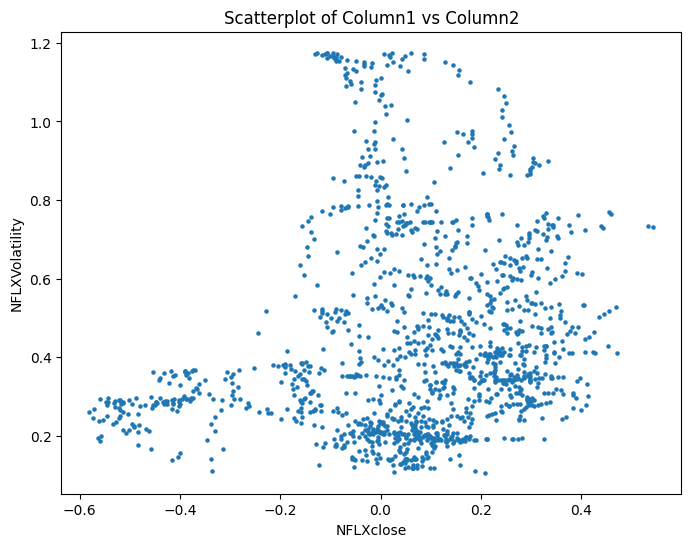

Pct Change Period is 60
Correlation between NLFXVolatility and SPOT: -0.10979105136723569



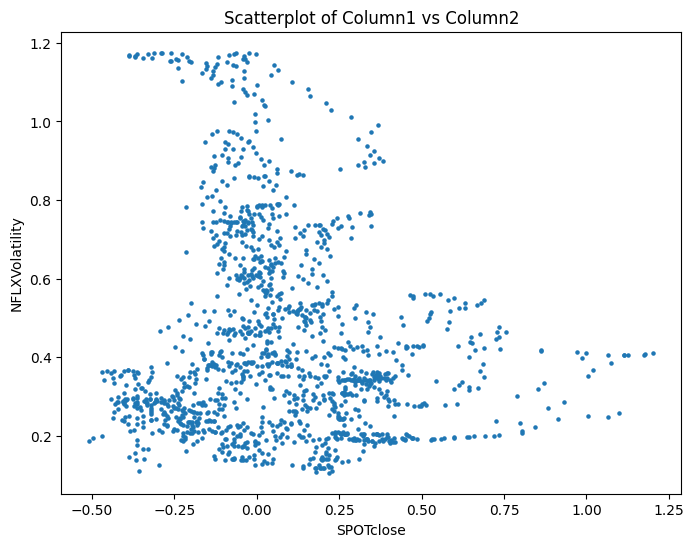

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Assuming you have 5 DataFrames named df1, df2, df3, df4, and df5
# Store them in a dictionary
dataframes =features_data
dfYvar=pd.DataFrame()
dfYvar=stock_data['NFLX']['NFLXVolatility']
display(stock_data['NFLX']['NFLXVolatility'] )

# Create scatterplots and correlation matrices

for i in range(5,61,5):
    #for key1, df1 in dctStockDfs.items(0):
    for key1, df1 in dataframes.items():
        #display(df1.columns)
        #display(df2.columns)

        #if key1 != key2:
        dfCorr=pd.concat([df1,dfYvar],join='inner',axis=1)
        #print(dfCorr.dtypes())
        dfCorr=dfCorr.pct_change(i)

########Comment out for close prediction

        window = i  # typical trading month
        dfCorr.iloc[:,1] = dfCorr.iloc[:,1].rolling(window=window).std() #* np.sqrt(252)
        #dfCorr.iloc[:,0]=np.log(dfCorr.iloc[:,0])
##############################################################################
        dfCorr.iloc[:,1]=dfCorr.iloc[:,1].shift(-i)
        dfCorr=dfCorr.dropna()
        #display(dfCorr)
        # Create scatterplot
        plt.figure(figsize=(8, 6))
        plt.scatter(dfCorr.iloc[:,0], dfCorr.iloc[:,1], s =5)
        plt.title('Scatterplot of Column1 vs Column2')
        plt.xlabel(dfCorr.columns[0])
        plt.ylabel('NFLXVolatility')


        # Calculate correlation matrix
        corr = dfCorr.iloc[:,1].corr(dfCorr.iloc[:,0])
        if abs(corr)>=0.1:
            #display(dfCorr)
            print(f'Pct Change Period is {i}')
            print(f'Correlation between NLFXVolatility and {key1}: {corr}\n')
            plt.show()

        else:
            plt.close()
            plt.clf()
        del(dfCorr)

In [ ]:
'''import requests
import pandas as pd

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=NFLX&outputsize=full&apikey={API_KEY}'
response = requests.get(url)
data = response.json()

# Extract time series data
ts_data = data['Time Series (Daily)']

# Convert to DataFrame and transpose so dates are rows
df = pd.DataFrame(ts_data).T

display(df)

# Optionally, rename columns for clarity
df = df.rename(columns={
    '1. open': 'Open',
    '2. high': 'High',
    '3. low': 'Low',
    '4. close': 'Close',
    '5. volume': 'Volume'
})

# Convert index to datetime and columns to numeric
df.index = pd.to_datetime(df.index)
df.index.name = 'date'
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)

print('Final DF')
display(df)'''

"import requests\nimport pandas as pd\n\nurl = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=NFLX&outputsize=full&apikey={API_KEY}'\nresponse = requests.get(url)\ndata = response.json()\n\n# Extract time series data\nts_data = data['Time Series (Daily)']\n\n# Convert to DataFrame and transpose so dates are rows\ndf = pd.DataFrame(ts_data).T\n\ndisplay(df)\n\n# Optionally, rename columns for clarity\ndf = df.rename(columns={\n    '1. open': 'Open',\n    '2. high': 'High',\n    '3. low': 'Low',\n    '4. close': 'Close',\n    '5. volume': 'Volume'\n})\n\n# Convert index to datetime and columns to numeric\ndf.index = pd.to_datetime(df.index)\ndf.index.name = 'date'\ndf[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)\n\nprint('Final DF')\ndisplay(df)"

In [ ]:

# Generate descriptive statistics
print(df.describe())

# Explore the data types of each column
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())


          USDclose
count  2516.000000
mean     69.755738
std      35.210131
min      12.450000
25%      39.735000
50%      66.679950
75%      93.152500
max     164.590000
USDclose    float64
dtype: object
USDclose    0
dtype: int64


NFLXclose  ROKUclose  SPOTclose  XLCclose  SMHclose  QQQclose  \
2018-10-10  -0.034371   0.011830  -0.228490 -0.076690 -0.087204 -0.053568   
2018-10-11  -0.016238   0.028802  -0.199968 -0.071633 -0.080000 -0.053730   
2018-10-12   0.053095   0.058896  -0.176076 -0.050573 -0.060334 -0.030586   
2018-10-15   0.051613   0.100232  -0.154589 -0.049784 -0.063697 -0.042533   
2018-10-16   0.056968   0.116255  -0.116148 -0.026289 -0.030675 -0.013801   
...               ...        ...        ...       ...       ...       ...   
2024-10-28   0.068111   0.122178   0.120975  0.047068  0.031833  0.040166   
2024-10-29   0.124563   0.171573   0.190596  0.076645  0.140903  0.083043   
2024-10-30   0.108963   0.219670   0.196720  0.088384  0.115869  0.077658   
2024-10-31   0.105921  -0.039280   0.171835  0.075736  0.077678  0.049475   
2024-11-01   0.135677   0.020662   0.191251  0.103020  0.138372  0.086340   

            SPYclose  USDclose  NFLXVolatility  
2018-10-10 -0.019725 -0.155041       26.842326  
2018-10-11 -0.034105 -0.158065       27.090506  
2018-10-12 -0.028550 -0.122008       26.841138  
2018-10-15 -0.037396 -0.122711       26.462660  
2018-10-16 -0.018448 -0.060678       25.378914  
...              ...       ...             ...  
2024-10-28  0.030425  0.159922       60.765799  
2024-10-29  0.053778  0.436051       59.181895  
2024-10-30  0.052745  0.391772       56.619437  
2024-10-31  0.034625  0.267506       53.681393  
2024-11-01  0.056777  0.436339       50.225936  

[1526 rows x 9 columns]

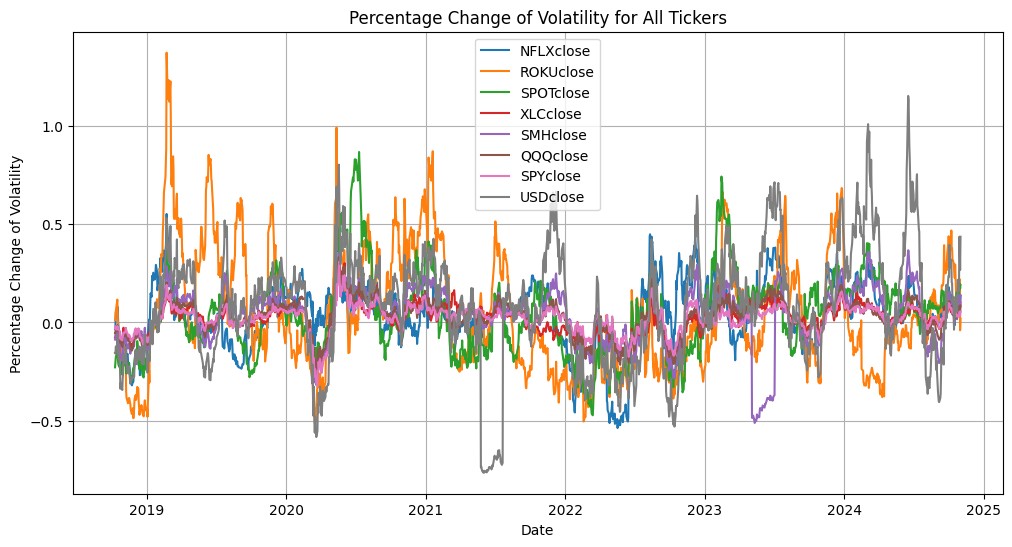

In [ ]:

import matplotlib.pyplot as plt

'''for column in stock_data['NFLX'].columns:
    if column != 'NFLXVolatility':  # Skip the volatility column itself
        stock_data['NFLX'][column + '_pct_change'] = stock_data['NFLX'][column].pct_change()'''

display(stock_data['NFLX'])
# Plot the percentage change
plt.figure(figsize=(12, 6))
for column in stock_data['NFLX'].columns:
    if 'Volatility' not in column:
      plt.plot(stock_data['NFLX'].index, stock_data['NFLX'][column], label=column.replace('_pct_change', ''))
plt.xlabel('Date')
plt.ylabel('Percentage Change of Volatility')
plt.title('Percentage Change of Volatility for All Tickers')
plt.legend()
plt.grid(True)
plt.show()


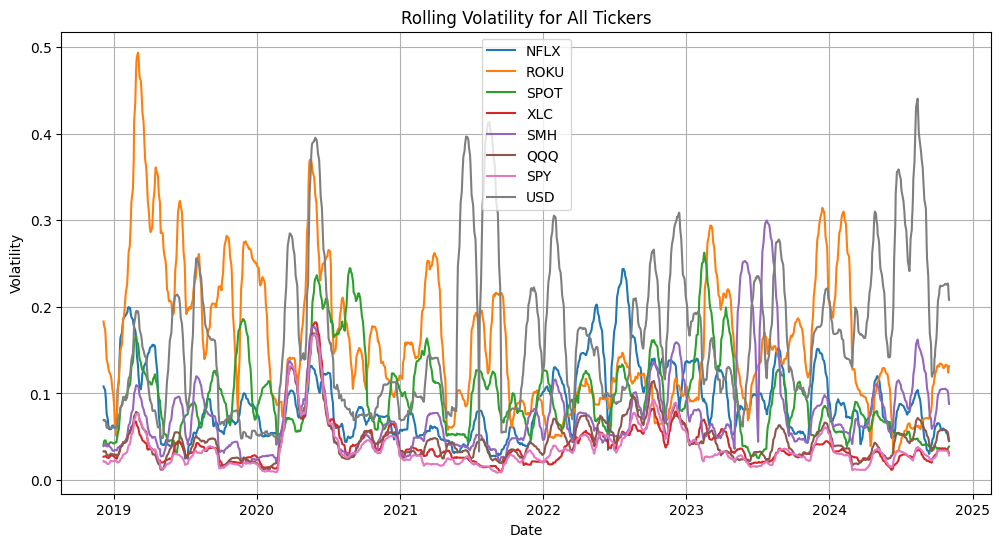

In [ ]:
# prompt: calculate rolling volatility from all the tickers using the combine dataframe and generate a plot for all the tickers

import numpy as np
import matplotlib.pyplot as plt

# Assuming 'stock_data' and its structure from the provided code
# Calculate rolling volatility for all tickers
dfChart=stock_data['NFLX'].copy()
for column in dfChart.columns:
    if column != 'NFLXVolatility' and 'close' in column:
        ticker = column.replace('close', '')
        dfChart[ticker + 'Volatility'] = dfChart[column].rolling(window=40).std() #* np.sqrt(252)

# Generate the plot
plt.figure(figsize=(12, 6))
for column in dfChart.columns:
    if 'Volatility' in column:
        plt.plot(dfChart.index, dfChart[column], label=column.replace('Volatility', ''))

plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Rolling Volatility for All Tickers')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
for ticker, df in stock_data.items():
    print(f"\nFirst 5 rows for {ticker}:")
    display(df.head(5))


First 5 rows for NFLX:


NFLXclose  ROKUclose  SPOTclose  XLCclose  SMHclose  QQQclose  \
2018-10-10  -0.034371   0.011830  -0.228490 -0.076690 -0.087204 -0.053568   
2018-10-11  -0.016238   0.028802  -0.199968 -0.071633 -0.080000 -0.053730   
2018-10-12   0.053095   0.058896  -0.176076 -0.050573 -0.060334 -0.030586   
2018-10-15   0.051613   0.100232  -0.154589 -0.049784 -0.063697 -0.042533   
2018-10-16   0.056968   0.116255  -0.116148 -0.026289 -0.030675 -0.013801   

            SPYclose  USDclose  NFLXVolatility  ROKUVolatility  \
2018-10-10 -0.019725 -0.155041             NaN             NaN   
2018-10-11 -0.034105 -0.158065             NaN             NaN   
2018-10-12 -0.028550 -0.122008             NaN             NaN   
2018-10-15 -0.037396 -0.122711             NaN             NaN   
2018-10-16 -0.018448 -0.060678             NaN             NaN   

            SPOTVolatility  XLCVolatility  SMHVolatility  QQQVolatility  \
2018-10-10             NaN            NaN            NaN            NaN   
2018-10-11             NaN            NaN            NaN            NaN   
2018-10-12             NaN            NaN            NaN            NaN   
2018-10-15             NaN            NaN            NaN            NaN   
2018-10-16             NaN            NaN            NaN            NaN   

            SPYVolatility  USDVolatility  
2018-10-10            NaN            NaN  
2018-10-11            NaN            NaN  
2018-10-12            NaN            NaN  
2018-10-15            NaN            NaN  
2018-10-16            NaN            NaN


First 5 rows for ROKU:


ROKUclose
2017-09-28      23.50
2017-09-29      26.54
2017-10-02      23.56
2017-10-03      20.81
2017-10-04      20.85


First 5 rows for SPOT:


SPOTclose
2018-04-03     149.01
2018-04-04     144.22
2018-04-05     143.99
2018-04-06     147.92
2018-04-09     150.00


First 5 rows for XLC:


XLCclose
2018-06-19     49.96
2018-06-20     50.58
2018-06-21     50.27
2018-06-22     50.49
2018-06-25     49.45


First 5 rows for SMH:


SMHclose
2015-01-02     54.49
2015-01-05     53.52
2015-01-06     52.26
2015-01-07     52.94
2015-01-08     54.26


First 5 rows for QQQ:


QQQclose
2015-01-02    102.94
2015-01-05    101.43
2015-01-06    100.07
2015-01-07    101.36
2015-01-08    103.30


First 5 rows for SPY:


SPYclose
2015-01-02    205.43
2015-01-05    201.72
2015-01-06    199.82
2015-01-07    202.31
2015-01-08    205.90


First 5 rows for USD:


USDclose
2015-01-02   94.4600
2015-01-05   91.4900
2015-01-06   87.2700
2015-01-07   88.8400
2015-01-08   94.3445

In [ ]:
import matplotlib.pyplot as plt

window_size = 40

for ticker in stock_data:
    df = stock_data[ticker].copy()
    # Check if the 'close' column exists before proceeding
    if 'close' in df.columns:
        # Calculate daily percent change
        df['Pct_Change'] = df['close'].pct_change() * 100

        # Rolling statistics on percent change
        df['Rolling_Mean'] = df['Pct_Change'].rolling(window=window_size).mean()
        df['Rolling_Std'] = df['Pct_Change'].rolling(window=window_size).std()

        # Store back into the dictionary (optional)
        stock_data[ticker] = df

        # Plotting
        plt.figure(figsize=(12, 6))
        plt.plot(df.index, df['Pct_Change'], label='Daily % Change', alpha=0.6)
        plt.plot(df.index, df['Rolling_Mean'], label=f'{window_size}-Day Rolling Mean', color='red')
        plt.fill_between(df.index, df['Rolling_Mean'] - df['Rolling_Std'],
                        df['Rolling_Mean'] + df['Rolling_Std'], color='orange', alpha=0.3,
                        label=f'{window_size}-Day Rolling Std Dev')
        plt.title(f'Daily % Change with Rolling Stats for {ticker}')
        plt.xlabel('Date')
        plt.ylabel('Percent Change (%)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"Warning: Ticker {ticker} does not have a 'close' column. Skipping volatility calculation.")

for ticker in stock_data:
    # Calculate percentage change based on closing price for each ticker
    if 'close' in stock_data[ticker].columns:
        stock_data[ticker]['Close_pct_change'] = stock_data[ticker]['close'].pct_change() * 100
    else:
        print(f"Warning: Ticker {ticker} does not have a 'close' column. Skipping percentage change calculation.")

    # Plot the percentage change
    if 'Close_pct_change' in stock_data[ticker].columns:
        plt.figure(figsize=(10, 6))
        plt.plot(stock_data[ticker].index, stock_data[ticker]['Close_pct_change'])
        plt.title(f'Percentage Change of Closing Price - {ticker}')
        plt.xlabel('Date')
        plt.ylabel('Percentage Change (%)')
        plt.grid(True)
        plt.show()
    else:
        print(f"Warning: Ticker {ticker} does not have a 'Close_pct_change' column. Skipping plot.")



# ARIMA Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

# Display the DataFrame
display(df)

# Replace infinite or NaN values with finite values before applying adfuller
#stock_data['NFLX']['NFLXVolatility'] = stock_data['NFLX']['NFLXVolatility'].replace([np.inf, -np.inf], np.nan).fillna(method='ffill')

# Drop any remaining NaN values after forward fill
stock_data['NFLX'].dropna(inplace=True) # This line is added to drop NaN

# Stationarity Check (Augmented Dickey-Fuller Test)
result = adfuller(stock_data['NFLX']['NFLXVolatility'])
print(f'ADF Statistic: {result[0]:.6f}')
print(f'p-value: {result[1]:.6f}')

# Interpretation of the ADF test result
if result[1] > 0.05:
    print("The series is likely non-stationary. Differencing is recommended.")
else:
    print("The series is stationary.")


USDclose
2015-01-02   94.4600
2015-01-05   91.4900
2015-01-06   87.2700
2015-01-07   88.8400
2015-01-08   94.3445
...              ...
2024-12-24   70.6300
2024-12-26   70.9400
2024-12-27   68.7400
2024-12-30   67.4300
2024-12-31   65.1400

[2516 rows x 1 columns]

ADF Statistic: -6.520179
p-value: 0.000000
The series is stationary.


The series is stationary.


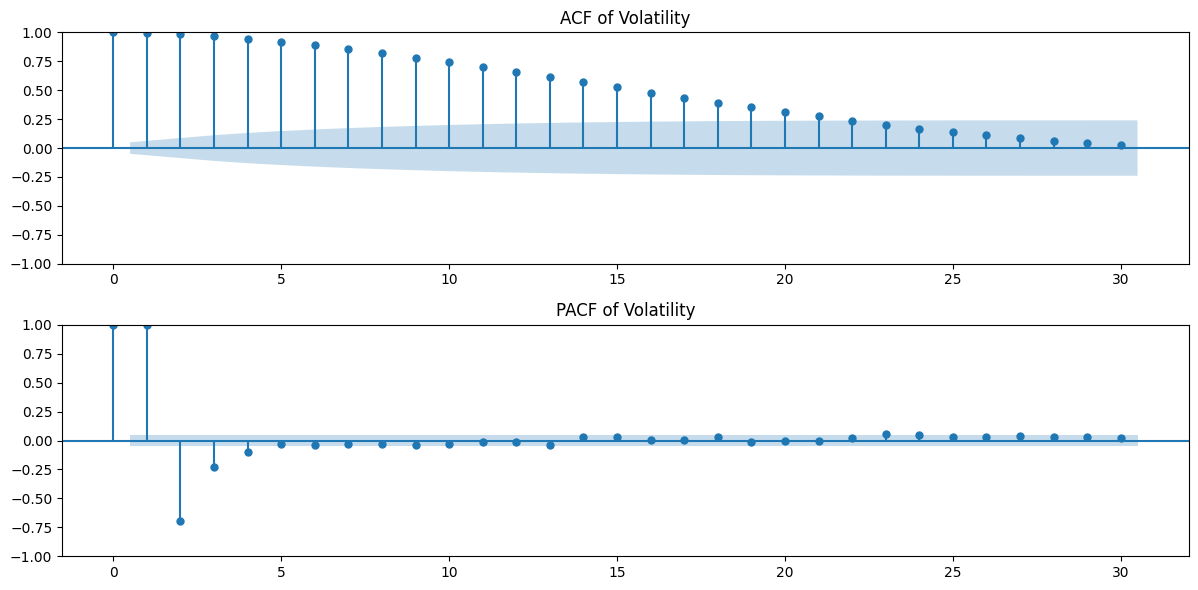

Selected ARIMA order: (4, 0, 4)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

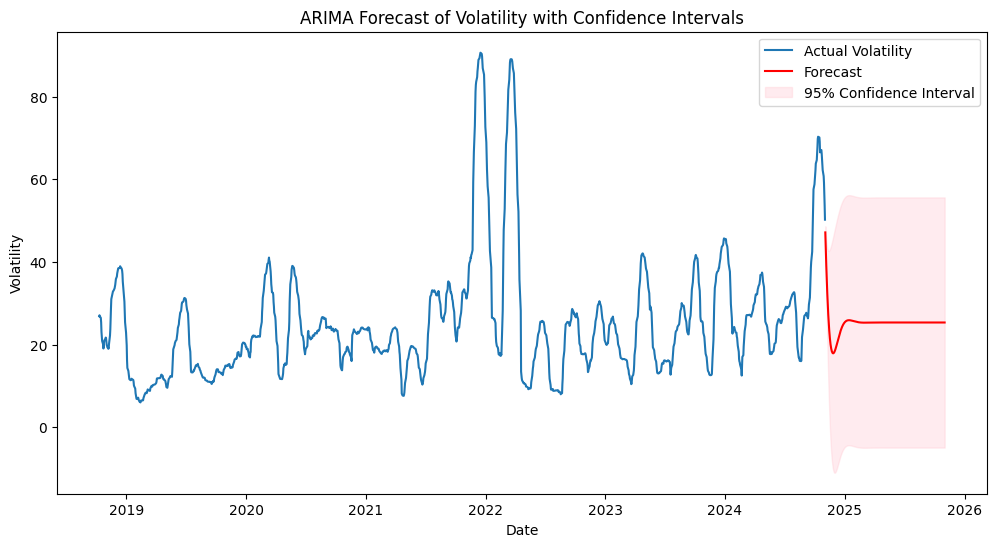

Root Mean Squared Error (RMSE): 0.75
                               SARIMAX Results                                
Dep. Variable:         NFLXVolatility   No. Observations:                 1526
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -1723.504
Date:                Wed, 28 May 2025   AIC                           3467.009
Time:                        02:15:15   BIC                           3520.313
Sample:                             0   HQIC                          3486.850
                               - 1526                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.3373      3.067      8.262      0.000      19.327      31.348
ar.L1          0.1693      0.086      1.959      0.050   -5.11e-05       0.339
ar.L2          

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import math


# Use the combined DataFrame containing 'NFLXVolatility'
df = stock_data['NFLX'].copy()

# Calculate volatility if it doesn't exist (This part likely needs adjustment)
#if 'Volatility' not in df.columns:
    # Calculate percent change for the 'Close' prices based on the 'NFLXclose' column
    #df['Close_pct_change'] = df['NFLXclose'].pct_change(40)
    # Calculate rolling volatility using a 40-day window
    #df['volatility'] = df['Close_pct_change'].rolling(window=40).std()
    # Drop rows with NaN values created by the calculations
    #df.dropna(inplace=True)

# ... (rest of the code remains the same)

# Interpretation of the ADF test
if result[1] > 0.05:
    print("The series is likely non-stationary. Differencing is recommended.")
else:
    print("The series is stationary.")

# ACF and PACF Plots (to determine p and q)
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(df['NFLXVolatility'], lags=30, ax=plt.gca())  # Use volatility for ACF
plt.title('ACF of Volatility')
plt.subplot(212)
plot_pacf(df['NFLXVolatility'], lags=30, ax=plt.gca())  # Use volatility for PACF
plt.title('PACF of Volatility')
plt.tight_layout()
plt.show()

# Selected ARIMA order
p, d, q = 4, 0, 4
print(f"Selected ARIMA order: ({p}, {d}, {q})")

# ARIMA Model
model = ARIMA(df['NFLXVolatility'], order=(p, d, q))  # Fit ARIMA on volatility
model_fit = model.fit()

# Make Predictions
forecast_steps = 365
predictions = model_fit.get_forecast(steps=forecast_steps)
predicted_mean = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['NFLXVolatility'], label='Actual Volatility')  # Plot actual volatility

future_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
plt.plot(future_index, predicted_mean, label='Forecast', color='red')

plt.fill_between(future_index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1],
                 color='pink', alpha=.3, label='95% Confidence Interval')

plt.title('ARIMA Forecast of Volatility with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Model Evaluation (example: RMSE)
in_sample_predictions = model_fit.predict()
rmse = math.sqrt(mean_squared_error(df['NFLXVolatility'][in_sample_predictions.index], in_sample_predictions))  # Comparing actual values with in-sample predictions
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Print model summary
print(model_fit.summary())

# GARCH

[1.         0.99510096 0.9833902  0.96588266 0.94339683 0.91675696
 0.88656561 0.85334827 0.81756319 0.77956436 0.73966485 0.69821298
 0.6555447  0.61185083 0.56761754 0.52330778 0.4792429  0.43574511
 0.3931933  0.35175704 0.31159694]


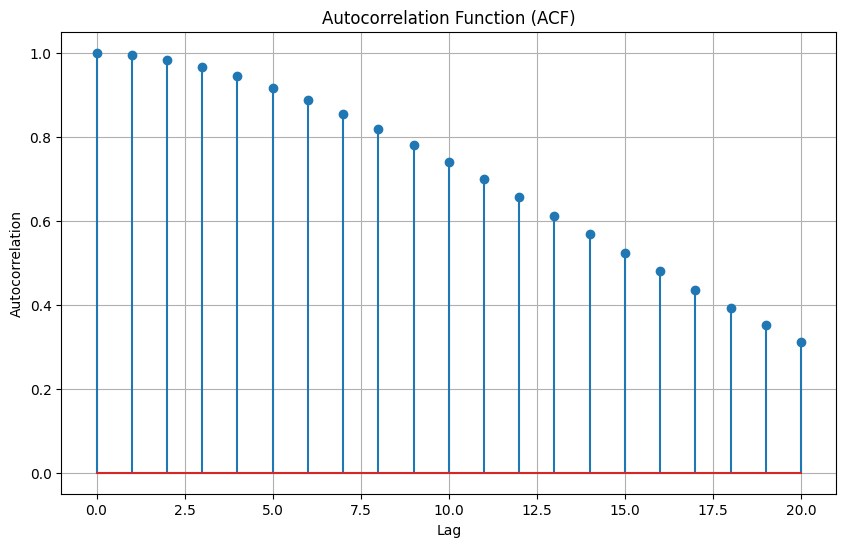

In [ ]:

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

#autocorrelations = acf(df['NFLXVolatility'], nlags=20)
autocorrelations = acf(df['NFLXVolatility'], nlags=20)

# Print or plot the autocorrelation values
print(autocorrelations)

plt.figure(figsize=(10, 6))
plt.stem(range(len(autocorrelations)), autocorrelations)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid(True)
plt.show()


In [ ]:
"""
#!pip install arch
import matplotlib.pyplot as plt
from arch import arch_model

for ticker in stock_data:
    # Prepare the data for GARCH modeling (use percentage changes)
    returns = stock_data[ticker]['NFLX_pct_change'].dropna()

    # Create and fit the GARCH(1,1) model
    model = arch_model(returns, vol='GARCH', p=1, q=1)
    model_fit = model.fit(update_freq=5)

    # Print model summary
    print(f"\nGARCH Model Summary for {ticker}:")
    print(model_fit.summary())

    forecast = model_fit.forecast(horizon=90)  # Forecast 90 days ahead

    plt.figure(figsize=(10, 6))
    plt.plot(forecast.variance.values[-1, :], label='Forecasted Volatility')
    plt.title(f'GARCH(1,1) Forecasted Volatility - {ticker}')
    plt.xlabel('Days Ahead')
    plt.ylabel('Variance')
    plt.legend()
    plt.show()
"""

'\n#!pip install arch\nimport matplotlib.pyplot as plt\nfrom arch import arch_model\n\nfor ticker in stock_data:\n    # Prepare the data for GARCH modeling (use percentage changes)\n    returns = stock_data[ticker][\'NFLX_pct_change\'].dropna()\n\n    # Create and fit the GARCH(1,1) model\n    model = arch_model(returns, vol=\'GARCH\', p=1, q=1)\n    model_fit = model.fit(update_freq=5)\n\n    # Print model summary\n    print(f"\nGARCH Model Summary for {ticker}:")\n    print(model_fit.summary())\n\n    forecast = model_fit.forecast(horizon=90)  # Forecast 90 days ahead\n\n    plt.figure(figsize=(10, 6))\n    plt.plot(forecast.variance.values[-1, :], label=\'Forecasted Volatility\')\n    plt.title(f\'GARCH(1,1) Forecasted Volatility - {ticker}\')\n    plt.xlabel(\'Days Ahead\')\n    plt.ylabel(\'Variance\')\n    plt.legend()\n    plt.show()\n'

# LSTM Model

In [ ]:
# prompt: generate an LSTM Model for all the tickers from the data above

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming 'stock_data' is your DataFrame with all ticker data
# and 'NFLXVolatility' is the target variable

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Prepare data for LSTM
def prepare_data(data, lookback=40): # Adjust lookback as needed
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.values)

    X, y = [], []
    for i in range(lookback, len(scaled_data)):
        X.append(scaled_data[i - lookback:i, :])
        y.append(scaled_data[i, 0])  # Assuming first column is target

    return np.array(X), np.array(y), scaler

# Loop through tickers and train/evaluate models
#for ticker in stock_data['NFLX'].columns:
if 'Volatility' not in ticker:  # Train only on volatility columns
    print(f"Training LSTM for {ticker}...")

    # Prepare data
    df_ticker = stock_data['NFLX'][[ticker]]  #Select only the current ticker
    display(stock_data)
    X, y, scaler = prepare_data(df_ticker)

    # Split data (adjust train/test split as needed)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Create and train LSTM model
    input_shape = (X_train.shape[1], X_train.shape[2])
    model = create_lstm_model(input_shape)
    model.fit(X_train, y_train, epochs=10, batch_size=32) # Adjust epochs and batch_size

    # Evaluation (example: loss)
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f"LSTM Loss for {ticker}: {loss}")

    # (Optional) Make predictions and inverse transform for visualization
    # y_pred = model.predict(X_test)
    # y_pred = scaler.inverse_transform(np.concatenate((y_pred, X_test[:,-1,1:]), axis=1))[:,0]
    # y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1,1),X_test[:,-1,1:]),axis=1))[:,0]
    # plt.plot(y_test, label='True')
    # plt.plot(y_pred, label='Predicted')
    # plt.legend()
    # plt.title(f'{ticker} Prediction')
    # plt.show()


Training LSTM for NFLXclose...


{'NFLX':             NFLXclose  ROKUclose  SPOTclose  XLCclose  SMHclose  QQQclose  \
 2018-12-06  -0.204745  -0.367132  -0.152913 -0.071174 -0.077518 -0.070924   
 2018-12-07  -0.186413  -0.328255  -0.094795 -0.051366 -0.070301 -0.060269   
 2018-12-10  -0.160075  -0.336662  -0.141065 -0.035935 -0.051126 -0.038502   
 2018-12-11  -0.218636  -0.407217  -0.190044 -0.056071 -0.064927 -0.061439   
 2018-12-12  -0.174857  -0.429891  -0.193281 -0.042217 -0.040299 -0.041577   
 ...               ...        ...        ...       ...       ...       ...   
 2024-10-28   0.068111   0.122178   0.120975  0.047068  0.031833  0.040166   
 2024-10-29   0.124563   0.171573   0.190596  0.076645  0.140903  0.083043   
 2024-10-30   0.108963   0.219670   0.196720  0.088384  0.115869  0.077658   
 2024-10-31   0.105921  -0.039280   0.171835  0.075736  0.077678  0.049475   
 2024-11-01   0.135677   0.020662   0.191251  0.103020  0.138372  0.086340   
 
             SPYclose  USDclose  NFLXVolatility  ROKUV

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.2035
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0087
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0065
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0045
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0044
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0039
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0041
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0040
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0038
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0032
LSTM Loss for NFLXclose: 0.0017239617882296443
Training LSTM for ROKUclose...


{'NFLX':             NFLXclose  ROKUclose  SPOTclose  XLCclose  SMHclose  QQQclose  \
 2018-12-06  -0.204745  -0.367132  -0.152913 -0.071174 -0.077518 -0.070924   
 2018-12-07  -0.186413  -0.328255  -0.094795 -0.051366 -0.070301 -0.060269   
 2018-12-10  -0.160075  -0.336662  -0.141065 -0.035935 -0.051126 -0.038502   
 2018-12-11  -0.218636  -0.407217  -0.190044 -0.056071 -0.064927 -0.061439   
 2018-12-12  -0.174857  -0.429891  -0.193281 -0.042217 -0.040299 -0.041577   
 ...               ...        ...        ...       ...       ...       ...   
 2024-10-28   0.068111   0.122178   0.120975  0.047068  0.031833  0.040166   
 2024-10-29   0.124563   0.171573   0.190596  0.076645  0.140903  0.083043   
 2024-10-30   0.108963   0.219670   0.196720  0.088384  0.115869  0.077658   
 2024-10-31   0.105921  -0.039280   0.171835  0.075736  0.077678  0.049475   
 2024-11-01   0.135677   0.020662   0.191251  0.103020  0.138372  0.086340   
 
             SPYclose  USDclose  NFLXVolatility  ROKUV

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0447
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0064
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0042
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0034
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0034
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0034
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0032
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0029
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0029
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0025
LSTM Loss for ROKUclose: 0.0014864465920254588
Training LSTM for SPOTclose...


{'NFLX':             NFLXclose  ROKUclose  SPOTclose  XLCclose  SMHclose  QQQclose  \
 2018-12-06  -0.204745  -0.367132  -0.152913 -0.071174 -0.077518 -0.070924   
 2018-12-07  -0.186413  -0.328255  -0.094795 -0.051366 -0.070301 -0.060269   
 2018-12-10  -0.160075  -0.336662  -0.141065 -0.035935 -0.051126 -0.038502   
 2018-12-11  -0.218636  -0.407217  -0.190044 -0.056071 -0.064927 -0.061439   
 2018-12-12  -0.174857  -0.429891  -0.193281 -0.042217 -0.040299 -0.041577   
 ...               ...        ...        ...       ...       ...       ...   
 2024-10-28   0.068111   0.122178   0.120975  0.047068  0.031833  0.040166   
 2024-10-29   0.124563   0.171573   0.190596  0.076645  0.140903  0.083043   
 2024-10-30   0.108963   0.219670   0.196720  0.088384  0.115869  0.077658   
 2024-10-31   0.105921  -0.039280   0.171835  0.075736  0.077678  0.049475   
 2024-11-01   0.135677   0.020662   0.191251  0.103020  0.138372  0.086340   
 
             SPYclose  USDclose  NFLXVolatility  ROKUV

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0527
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0055
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0041
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0035
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0029
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0027
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0026
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0025
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0026
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0022
LSTM Loss for SPOTclose: 0.0012446652399376035
Training LSTM for XLCclose...


{'NFLX':             NFLXclose  ROKUclose  SPOTclose  XLCclose  SMHclose  QQQclose  \
 2018-12-06  -0.204745  -0.367132  -0.152913 -0.071174 -0.077518 -0.070924   
 2018-12-07  -0.186413  -0.328255  -0.094795 -0.051366 -0.070301 -0.060269   
 2018-12-10  -0.160075  -0.336662  -0.141065 -0.035935 -0.051126 -0.038502   
 2018-12-11  -0.218636  -0.407217  -0.190044 -0.056071 -0.064927 -0.061439   
 2018-12-12  -0.174857  -0.429891  -0.193281 -0.042217 -0.040299 -0.041577   
 ...               ...        ...        ...       ...       ...       ...   
 2024-10-28   0.068111   0.122178   0.120975  0.047068  0.031833  0.040166   
 2024-10-29   0.124563   0.171573   0.190596  0.076645  0.140903  0.083043   
 2024-10-30   0.108963   0.219670   0.196720  0.088384  0.115869  0.077658   
 2024-10-31   0.105921  -0.039280   0.171835  0.075736  0.077678  0.049475   
 2024-11-01   0.135677   0.020662   0.191251  0.103020  0.138372  0.086340   
 
             SPYclose  USDclose  NFLXVolatility  ROKUV

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2357
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0089
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0051
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0051
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0043
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0038
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0042
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0037
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0033
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0031
LSTM Loss for XLCclose: 0.0019579457584768534
Training LSTM for SMHclose...


{'NFLX':             NFLXclose  ROKUclose  SPOTclose  XLCclose  SMHclose  QQQclose  \
 2018-12-06  -0.204745  -0.367132  -0.152913 -0.071174 -0.077518 -0.070924   
 2018-12-07  -0.186413  -0.328255  -0.094795 -0.051366 -0.070301 -0.060269   
 2018-12-10  -0.160075  -0.336662  -0.141065 -0.035935 -0.051126 -0.038502   
 2018-12-11  -0.218636  -0.407217  -0.190044 -0.056071 -0.064927 -0.061439   
 2018-12-12  -0.174857  -0.429891  -0.193281 -0.042217 -0.040299 -0.041577   
 ...               ...        ...        ...       ...       ...       ...   
 2024-10-28   0.068111   0.122178   0.120975  0.047068  0.031833  0.040166   
 2024-10-29   0.124563   0.171573   0.190596  0.076645  0.140903  0.083043   
 2024-10-30   0.108963   0.219670   0.196720  0.088384  0.115869  0.077658   
 2024-10-31   0.105921  -0.039280   0.171835  0.075736  0.077678  0.049475   
 2024-11-01   0.135677   0.020662   0.191251  0.103020  0.138372  0.086340   
 
             SPYclose  USDclose  NFLXVolatility  ROKUV

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2995
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0124
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0087
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0065
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0059
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0054
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0056
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0050
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0059
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0059
LSTM Loss for SMHclose: 0.004378029610961676
Training LSTM for QQQclose...


{'NFLX':             NFLXclose  ROKUclose  SPOTclose  XLCclose  SMHclose  QQQclose  \
 2018-12-06  -0.204745  -0.367132  -0.152913 -0.071174 -0.077518 -0.070924   
 2018-12-07  -0.186413  -0.328255  -0.094795 -0.051366 -0.070301 -0.060269   
 2018-12-10  -0.160075  -0.336662  -0.141065 -0.035935 -0.051126 -0.038502   
 2018-12-11  -0.218636  -0.407217  -0.190044 -0.056071 -0.064927 -0.061439   
 2018-12-12  -0.174857  -0.429891  -0.193281 -0.042217 -0.040299 -0.041577   
 ...               ...        ...        ...       ...       ...       ...   
 2024-10-28   0.068111   0.122178   0.120975  0.047068  0.031833  0.040166   
 2024-10-29   0.124563   0.171573   0.190596  0.076645  0.140903  0.083043   
 2024-10-30   0.108963   0.219670   0.196720  0.088384  0.115869  0.077658   
 2024-10-31   0.105921  -0.039280   0.171835  0.075736  0.077678  0.049475   
 2024-11-01   0.135677   0.020662   0.191251  0.103020  0.138372  0.086340   
 
             SPYclose  USDclose  NFLXVolatility  ROKUV

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1523
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0079
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0046
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0045
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0040
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0042
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0035
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0034
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0033
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0033
LSTM Loss for QQQclose: 0.002162236487492919
Training LSTM for SPYclose...


{'NFLX':             NFLXclose  ROKUclose  SPOTclose  XLCclose  SMHclose  QQQclose  \
 2018-12-06  -0.204745  -0.367132  -0.152913 -0.071174 -0.077518 -0.070924   
 2018-12-07  -0.186413  -0.328255  -0.094795 -0.051366 -0.070301 -0.060269   
 2018-12-10  -0.160075  -0.336662  -0.141065 -0.035935 -0.051126 -0.038502   
 2018-12-11  -0.218636  -0.407217  -0.190044 -0.056071 -0.064927 -0.061439   
 2018-12-12  -0.174857  -0.429891  -0.193281 -0.042217 -0.040299 -0.041577   
 ...               ...        ...        ...       ...       ...       ...   
 2024-10-28   0.068111   0.122178   0.120975  0.047068  0.031833  0.040166   
 2024-10-29   0.124563   0.171573   0.190596  0.076645  0.140903  0.083043   
 2024-10-30   0.108963   0.219670   0.196720  0.088384  0.115869  0.077658   
 2024-10-31   0.105921  -0.039280   0.171835  0.075736  0.077678  0.049475   
 2024-11-01   0.135677   0.020662   0.191251  0.103020  0.138372  0.086340   
 
             SPYclose  USDclose  NFLXVolatility  ROKUV

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1070
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0039
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0028
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0031
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0024
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0019
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0019
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0024
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0018
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0018
LSTM Loss for SPYclose: 0.0009277597418986261
Training LSTM for USDclose...


{'NFLX':             NFLXclose  ROKUclose  SPOTclose  XLCclose  SMHclose  QQQclose  \
 2018-12-06  -0.204745  -0.367132  -0.152913 -0.071174 -0.077518 -0.070924   
 2018-12-07  -0.186413  -0.328255  -0.094795 -0.051366 -0.070301 -0.060269   
 2018-12-10  -0.160075  -0.336662  -0.141065 -0.035935 -0.051126 -0.038502   
 2018-12-11  -0.218636  -0.407217  -0.190044 -0.056071 -0.064927 -0.061439   
 2018-12-12  -0.174857  -0.429891  -0.193281 -0.042217 -0.040299 -0.041577   
 ...               ...        ...        ...       ...       ...       ...   
 2024-10-28   0.068111   0.122178   0.120975  0.047068  0.031833  0.040166   
 2024-10-29   0.124563   0.171573   0.190596  0.076645  0.140903  0.083043   
 2024-10-30   0.108963   0.219670   0.196720  0.088384  0.115869  0.077658   
 2024-10-31   0.105921  -0.039280   0.171835  0.075736  0.077678  0.049475   
 2024-11-01   0.135677   0.020662   0.191251  0.103020  0.138372  0.086340   
 
             SPYclose  USDclose  NFLXVolatility  ROKUV

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1284
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0081
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0053
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0044
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0041
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0041
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0043
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0036
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0037
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0034
LSTM Loss for USDclose: 0.005672445986419916


# Random Forest Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error, r2_score


# Split features (all columns except last) and target (last column)
X = df.iloc[:, :-1]  # Select all rows, all columns except last [1][2]
y = df.iloc[:, -1]   # Select all rows, last column [1][2]


# Split data into training and test sets
split_point = int(len(df) * 0.66)
train = df.iloc[:split_point]
test = df.iloc[split_point:]

# Separate features and target
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': [None, 'sqrt', 'log2'],  # 'auto' is invalid in newer sklearn versions
    'max_depth': [ 1,2,3,4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}



# Initialize search with 10 iterations and 3-fold CV
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit search on training data
random_search.fit(X_train, y_train)

# Get best model from search [2][3]
best_rf = random_search.best_estimator_

# Evaluation using best model (replace original rf with best_rf)
print(f'\nBest hyperparameters: {random_search.best_params_}')

# Training evaluation
y_train_pred = best_rf.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f'\nTraining Metrics:\nRMSE: {train_rmse:.2f}, R²: {train_r2:.2f}')

# Testing evaluation
y_test_pred = best_rf.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'\nTesting Metrics:\nRMSE: {test_rmse:.2f}, R²: {test_r2:.2f}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 1, 'bootstrap': False}

Training Metrics:
RMSE: 0.01, R²: 0.27

Testing Metrics:
RMSE: 0.01, R²: -0.12


In [ ]:

'''from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# Model training and evaluation
for ticker in TICKERS:
    X, y = stock_data[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Convert predictions and true values to binary classification
    y_pred_binary = (y_pred > y_test.shift(1)).astype(int)
    y_test_binary = (y_test > y_test.shift(1)).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test_binary[1:], y_pred_binary[1:])
    precision = precision_score(y_test_binary[1:], y_pred_binary[1:])
    recall = recall_score(y_test_binary[1:], y_pred_binary[1:])
    f1 = f1_score(y_test_binary[1:], y_pred_binary[1:])

    # AUC-ROC calculation
    try:
        y_prob = model.predict_proba(X_test)[:, 1]  # Assuming probability of positive class
        auc_roc = roc_auc_score(y_test_binary[1:], y_prob[1:])
        fpr, tpr, thresholds = roc_curve(y_test_binary[1:], y_prob[1:])

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'AUC-ROC Curve for {ticker}')
        plt.legend()
        plt.show()
    except AttributeError as e:
        print(f"Error calculating AUC-ROC for {ticker}: {e}")
        auc_roc = 'N/A'

    # Print metrics
    print(f"Metrics for {ticker}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"AUC-ROC: {auc_roc}")


'''

'from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve\nimport matplotlib.pyplot as plt\nimport requests\nimport pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import RandomForestRegressor\n\n\n# Model training and evaluation\nfor ticker in TICKERS:\n    X, y = stock_data[i]\n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)\n    \n    model = RandomForestRegressor(n_estimators=100, random_state=42)\n    model.fit(X_train, y_train)\n\n    # Make predictions\n    y_pred = model.predict(X_test)\n\n    # Convert predictions and true values to binary classification\n    y_pred_binary = (y_pred > y_test.shift(1)).astype(int)\n    y_test_binary = (y_test > y_test.shift(1)).astype(int)\n\n    # Calculate metrics\n    accuracy = accuracy_score(y_test_binary[1:], y_pred_binary[1:])\n    precision = precision_score(y_test_binary[1:], y_p

In [ ]:

#RMSE for Tickers for the Random Forest Models
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

rmse_values = {}

for i, ticker in enumerate(tickers):
    X, y = all_data[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values[ticker] = rmse
    print(f"RMSE for {ticker}: {rmse}")




NameError: name 'tickers' is not defined

# XGBoost Model

In [ ]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Prepare the data for XGBoost
all_data = []
tickers = []

for ticker, df in stock_data.items():
    # Check if a column ending with 'close' exists
    close_column = next((col for col in df.columns if col.endswith('close')), None)

    # If no 'close' column found, skip this ticker
    if close_column is None:
        print(f"Warning: Ticker {ticker} does not have a 'close' column. Skipping.")
        continue

    # Calculate percent change for the closing price
    df['Close_pct_change'] = df[close_column].pct_change()

    # Calculate rolling volatility using a 40-day window
    df['volatility'] = df['Close_pct_change'].rolling(window=40).std()

    # Drop rows with NaN values created by the calculations
    df.dropna(inplace=True)

    # Features (example: using previous day's closing price)
    X = df[['Close_pct_change']]  # Using percent change as a feature
    y = df['volatility']  # Change target variable to volatility
    all_data.append((X, y))
    tickers.append(ticker)

# Train an XGBoost model for each ticker
for i, ticker in enumerate(tickers):
    X, y = all_data[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Plot actual vs. predicted
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test, label='Actual Volatility')
    plt.plot(y_test.index, y_pred, label='Predicted Volatility', linestyle='--')
    plt.title(f'XGBoost Predictions for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.grid(True)
    plt.show()


AttributeError: 'dict' object has no attribute 'columns'

In [ ]:

import numpy as np
rmse_values_xgboost = {}

for i, ticker in enumerate(tickers):
    X, y = all_data[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values_xgboost[ticker] = rmse
    print(f"XGBoost RMSE for {ticker}: {rmse}")


In [ ]:

import numpy as np
from sklearn.model_selection import KFold

n_splits = 5

for i, ticker in enumerate(tickers):
    X, y = all_data[i]
    kf = KFold(n_splits=n_splits, shuffle=False) # Shuffle=False to maintain time order
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    print(f"\n{ticker}:")
    print(f"RMSE scores for each fold: {rmse_scores}")
    print(f"Average RMSE: {np.mean(rmse_scores)}")
    print(f"Standard Deviation of RMSE: {np.std(rmse_scores)}")


In [ ]:

from sklearn.metrics import r2_score

r_squared_values = {}

for i, ticker in enumerate(tickers):
    X, y = all_data[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)
    r_squared_values[ticker] = r_squared
    print(f"R-squared for {ticker}: {r_squared}")
